In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Generally these Ebay auction sales are for sports autographs. 

- The TestSet and TrainingSet are contain the whole dataset.

- The TrainingSubset and TestSubset contain the data with quantity sold equals 1 (auction leads to sell the product).

In [4]:
df1 = pd.read_csv(r"raw/TestSet.csv")

In [5]:
# To see the whole columns
pd.set_option('display.max_columns', None)

In [6]:
# What is happening with TestSet.csv
df1.head()

,EbayID,QuantitySold,Price,PricePercent,StartingBidPercent,SellerName,SellerClosePercent,Category,PersonID,StartingBid,AvgPrice,EndDay,HitCount,AuctionAvgHitCount,ItemAuctionSellPercent,SellerSaleAvgPriceRatio,SellerAvg,SellerItemAvg,AuctionHitCountAvgRatio,BestOffer,ReturnsAccepted,IsHOF,ItemListedCount,AuctionCount,AuctionSaleCount,SellerAuctionCount,SellerAuctionSaleCount,AuctionMedianPrice
0,400476160084,0,0.99,0.5892,0.5892,harryjean0,0.128269,73409,8215,0.99,1.6800,Sunday,5,78,0,0.088608,0.42,3,6,0.064103,0,1,0,79,7,2791,358,0.99
1,350785007664,0,119.00,1.1427,1.1427,rrsports23,0.116667,27260,34,119.00,104.1330,Monday,6,77,1,0.458494,1.67,50,25,0.077922,0,1,1,1819,834,60,7,77.00
2,380629932508,1,1.75,1.0416,0.4464,mojo640,0.531599,73409,8215,0.75,1.6800,Thursday,8,78,0,0.088608,0.30,2,7,0.102564,0,0,0,79,7,269,143,0.99
3,300896813674,1,66.00,0.6338,0.0000,mintsignatures,0.971014,27260,34,0.01,104.1330,Saturday,116,77,0,0.458494,0.80,49,61,1.506494,0,1,1,1819,834,138,134,77.00
4,200918931232,0,9.99,0.5197,0.5197,realdealsignatures,0.187117,27285,28504,9.99,19.2203,Thursday,2,55,0,0.148515,0.28,2,8,0.036364,0,1,0,202,30,326,61,11.00


In [9]:
df1.shape

(37460, 28)

In [10]:
# What is happening with TrainingSubSet.csv
df2 = pd.read_csv(r"raw/TrainingSet.csv")
df2.head()

,EbayID,QuantitySold,Price,PricePercent,StartingBidPercent,SellerName,SellerClosePercent,Category,PersonID,StartingBid,AvgPrice,EndDay,HitCount,AuctionAvgHitCount,ItemAuctionSellPercent,SellerSaleAvgPriceRatio,SellerAvg,SellerItemAvg,AuctionHitCountAvgRatio,BestOffer,ReturnsAccepted,IsHOF,ItemListedCount,AuctionCount,AuctionSaleCount,SellerAuctionCount,SellerAuctionSaleCount,AuctionMedianPrice
0,160983189073,1,27.25,1.4787,0.0537,petesandi,0.925926,73396,9174,0.99,18.4273,Tuesday,57,37,0,0.499142,2.06,56,29,1.540541,0,1,1,583,291,54,50,12.26
1,390549601720,1,43.00,1.4422,0.3350,graphn4fun,0.990566,27278,11046,9.99,29.8150,Sunday,34,84,1,0.358333,0.92,52,55,0.404762,0,0,0,120,43,106,105,24.45
2,200901284676,1,11.00,0.5969,0.5426,hondo19461946,0.422131,73396,9174,10.00,18.4273,Monday,12,37,0,0.499142,0.91,18,21,0.324324,0,1,1,583,291,244,103,12.26
3,271162670857,0,10.00,0.5426,0.5426,winemeyer45,0.245098,73396,9174,10.00,18.4273,Monday,10,37,0,0.499142,0.86,19,26,0.270270,0,0,1,583,291,102,25,12.26
4,310611578768,0,9.99,1.9159,1.9159,chucksmemorabilia,0.295359,73396,17956,9.99,5.2142,Monday,10,50,0,0.321168,0.59,33,53,0.200000,0,1,0,137,44,237,70,3.02


In [11]:
df2.shape

(258588, 28)

So the total number of records οn this dataset (both Test and Training Set) is 296048.<br>
The training subset is the 0.12 (12%) percentage of the whole dataset.<br>
The testing subset is the 0.88(88%) percentage of the whole dataset.<br>

# What does the meaning of each value ? <br>

EbayID --> Unique ID of each and every auction. 

QuantitySold --> If the auction leads to sell. Represented by a 0 or 1.

Price --> Final price of the auction. If the listing does not result in a sale, the Price will be equal to the StartingBid.  

PricePercent --> tells you how the item’s final price compares to a reference “typical” price for similar auctions.<br>
    - This price can be computed by subtracting the 'Price' with 'AvgPrice'  (Price/AvgPrice).

StartingBidPercent --> The ratio of the StartingBid divided by sku’s AvgPrice. (StartingBid/AvgPrice)

SellerName --> The name of the person who put his aytographed item for sale.

SellerClosePercent --> The ratio of the number of auctions resulting in sale for a seller divided <br> by total number of auctions the seller listed.

Category --> eBay autograph category by sport.

PersonID -->  ID of the person which is host auction.       ---------

StartingBid --> Minimum bid for the auction.

AvgPrice --> The average sale price by sku (Stock Keeping Unit: μια μονάδα απογραφής. Υπάρχει μοναδικός αριθμός SKU για κάθε προιόν) 

EndDay --> The week days (Monday,Tuesday, Thursday ... Sunday) which happened the auction.

HitCount --> how many times the site of this speicific auction has been seen (πόσες φορες έχουν δει την δημοπρασια όσο πιο πολλές τόσο πιο δημοοφιλές). -----

AuctionAvgHitCount --> Avg hits for auctions of the same type or same product. ----

ItemAuctionSellPercent --> The ratio of the number of auctions resulting in sale for a sku divided by total number of auctions the listed for the sku. ----

SellerSaleAvgPriceRatio --> The ratio of the sale price realized by a specific seller divided by the average price of the same skus.  (SellerAvg/AvgPrice)

SellerAvg --> Average Price value for this specific seller (not for this specific product bur for each one that sold by the seller).  ------

SellerItemAvg --> Average quantity sold by this seller this specific item. --------

!!!!!!!!!!!! AuctionHitCountAvgRatio --> Ratio of hits for a specific auction related to average hits for similar products. (HitCount/AuctionAvgHitCount)

!!!!!!!!!!!! BestOffer --> Best bid on auction.

ReturnsAccepted --> Whether the seller accepts returns.

IsHOF --> IsHOF	Whether the player in their sport’s Hall of Fame. 

ItemListedCount --> Total number of times this SKU has been listed on eBay.Sellers may list the same SKU multiple times (different auctions). ItemListedCount is the total count of all those listings.

AuctionCount --> The number of auctions listed by sku. how many times this product has been listed in this dataset.

AuctionSaleCount --> How many auctions have been completed with a sale. (AuctionSaleCount< AuctionCount) -----------

SellerAuctionCount -->   Πόσα auctions έχει δημιουργήσει ο συγκεκριμένος seller.-------------

SellerAuctionSaleCount --> 	Total number of auctions by this seller that resulted in a sale.

AuctionMedianPrice -->  Median sale price of auctions for the same SKU (PersonID).(median is less sensitive to outliers).

In [12]:
#Testing Subset
df3 = pd.read_csv(r'raw/TestSubset.csv')
df3.head()

,EbayID,Price,PricePercent,StartingBidPercent,SellerName,SellerClosePercent,Category,PersonID,StartingBid,AvgPrice,EndDay,QuantitySold,HitCount,AuctionAvgHitCount,Authenticated,ItemAuctionSellPercent,SellerSaleAvgPriceRatio,SellerAvg,SellerItemAvg,AuctionHitCountAvgRatio,BestOffer,ReturnsAccepted,IsHOF,BidCount,AuctionCount,AuctionSaleCount,SellerAuctionCount,SellerAuctionSaleCount,PriceBuckets,AuctionMedianPrice,IsInMedianRatio10Percent,IsInMedianRatio20Percent,IsInMedianRatio25Percent
0,310660463424,7.99,0.9038,0.9038,det.tigss,0.152542,73396,303,7.99,8.8400,Friday,1,4,3,0,0.600000,0.52,6,12,1.333333,0,0,0,1,5,3,59,9,10,7.99,1,1,1
1,300896439219,0.99,1.0000,1.0000,sprad22,0.107143,53,343,0.99,0.9900,Friday,1,11,11,0,1.000000,0.52,2,4,1.000000,0,0,0,1,1,1,616,66,5,0.99,1,1,1
2,190830497666,14.99,0.2814,0.2814,phillyguy856,0.380952,27260,412,14.99,53.2615,Thursday,1,25,102,0,0.411765,0.45,8,18,0.245098,0,0,0,1,51,21,84,32,15,26.00,0,0,0
3,310659262203,10.50,0.5070,0.2892,tmt51,0.333333,27265,412,5.99,20.7066,Friday,1,67,63,0,0.321429,1.27,43,46,1.063492,0,1,0,2,28,9,204,68,15,15.25,0,0,0
4,221218670032,43.88,0.8970,0.0202,rochestersports,0.995726,27277,429,0.99,48.9142,Wednesday,1,32,84,0,0.904762,0.88,78,89,0.380952,0,1,0,10,21,19,1638,1631,45,45.88,1,1,1


In [13]:
df3.shape

(9392, 33)

In [14]:
#Training subset
df4 = pd.read_csv(r'raw/TrainingSubset.csv')
df4.head()

,EbayID,Price,PricePercent,StartingBidPercent,SellerName,SellerClosePercent,Category,PersonID,StartingBid,AvgPrice,EndDay,QuantitySold,HitCount,AuctionAvgHitCount,Authenticated,ItemAuctionSellPercent,SellerSaleAvgPriceRatio,SellerAvg,SellerItemAvg,AuctionHitCountAvgRatio,BestOffer,ReturnsAccepted,IsHOF,BidCount,AuctionCount,AuctionSaleCount,SellerAuctionCount,SellerAuctionSaleCount,PriceBuckets,AuctionMedianPrice,IsInMedianRatio10Percent,IsInMedianRatio20Percent,IsInMedianRatio25Percent
0,350752140634,0.01,0.0038,0.0038,inkcasualty,0.725377,73396,33,0.01,2.5808,Friday,1,6,58,0,0.227723,0.37,1,4,0.103448,0,0,0,1,101,23,1726,1252,5,1.00,0,0,0
1,380610306320,5.55,1.0000,0.0018,prettysam1012,0.563847,27260,39,0.01,5.5500,Sunday,1,16,9,0,1.000000,0.94,14,15,1.777778,0,1,0,7,1,1,603,340,10,5.55,1,1,1
2,151033305503,0.99,0.6832,0.6832,harryjean0,0.128269,73396,39,0.99,1.4490,Sunday,1,8,97,0,0.038462,0.42,3,6,0.082474,0,1,0,1,26,1,2791,358,5,0.99,1,1,1
3,350756072255,0.06,1.0000,0.1666,inkcasualty,0.725377,73396,182,0.01,0.0600,Friday,1,4,15,0,0.076923,0.37,1,4,0.266667,0,0,0,2,13,1,1726,1252,5,0.06,1,1,1
4,121072982322,0.99,0.2826,0.2826,lock-em-up-bob,0.605851,73396,265,0.99,3.5025,Monday,1,4,28,0,0.042254,0.91,7,9,0.142857,0,1,0,1,71,3,1880,1139,5,0.99,1,1,1


In [15]:
df4.shape

(79732, 33)

As we can see on this dataset there will be a problem which is the "Curse Of dimensionality".<br>
The curse of dimensionality is a problem that arises when we are working with a lot of data having<br> multiple features or we can say it as high dimensional data. The dimension of the data means the number<br> of features or columns in our dataset.

On this dataset we have:
- 28 dimensions for the 'Full dataset'

- 33 dimensions for the Subsets dataset.

On these both datasets we can drop the categories EbayID, SellerName, and PersonID as they don 't give predictive information.<br>
Apart from that QuantitySold category is 1 for both Training and TestSubset (so we drop this column too).

# First Task
I will work on the subset of the data corresponding to auctions that resulted in a sale in order to build a regression model for predicting the final auction price.

In [16]:
# First we will combine the Training and Test Subset
df_sub = pd.concat([df3,df4],ignore_index=True, sort=False)
df_sub.head()

,EbayID,Price,PricePercent,StartingBidPercent,SellerName,SellerClosePercent,Category,PersonID,StartingBid,AvgPrice,EndDay,QuantitySold,HitCount,AuctionAvgHitCount,Authenticated,ItemAuctionSellPercent,SellerSaleAvgPriceRatio,SellerAvg,SellerItemAvg,AuctionHitCountAvgRatio,BestOffer,ReturnsAccepted,IsHOF,BidCount,AuctionCount,AuctionSaleCount,SellerAuctionCount,SellerAuctionSaleCount,PriceBuckets,AuctionMedianPrice,IsInMedianRatio10Percent,IsInMedianRatio20Percent,IsInMedianRatio25Percent
0,310660463424,7.99,0.9038,0.9038,det.tigss,0.152542,73396,303,7.99,8.8400,Friday,1,4,3,0,0.600000,0.52,6,12,1.333333,0,0,0,1,5,3,59,9,10,7.99,1,1,1
1,300896439219,0.99,1.0000,1.0000,sprad22,0.107143,53,343,0.99,0.9900,Friday,1,11,11,0,1.000000,0.52,2,4,1.000000,0,0,0,1,1,1,616,66,5,0.99,1,1,1
2,190830497666,14.99,0.2814,0.2814,phillyguy856,0.380952,27260,412,14.99,53.2615,Thursday,1,25,102,0,0.411765,0.45,8,18,0.245098,0,0,0,1,51,21,84,32,15,26.00,0,0,0
3,310659262203,10.50,0.5070,0.2892,tmt51,0.333333,27265,412,5.99,20.7066,Friday,1,67,63,0,0.321429,1.27,43,46,1.063492,0,1,0,2,28,9,204,68,15,15.25,0,0,0
4,221218670032,43.88,0.8970,0.0202,rochestersports,0.995726,27277,429,0.99,48.9142,Wednesday,1,32,84,0,0.904762,0.88,78,89,0.380952,0,1,0,10,21,19,1638,1631,45,45.88,1,1,1


In [17]:
# Take a copy of the main (subset) data
df_sub = df_sub.copy()

In [18]:
# Drop the columns which are not give further information (EbayID, SellerName, and PersonID)
df_sub = df_sub.drop(columns=['EbayID','SellerName','PersonID','QuantitySold'],axis=1)

In [19]:
# On Testing and Training Subset 
# The best offer category has only zero values
df_sub["BestOffer"].value_counts()

BestOffer
0    89124
Name: count, dtype: int64

In [20]:
# Drop the BestOffer column which has only zero values
df_sub = df_sub.drop(columns=["BestOffer"],axis=1)

In [21]:
# Check if the data concatenated
df_sub.shape

(89124, 28)

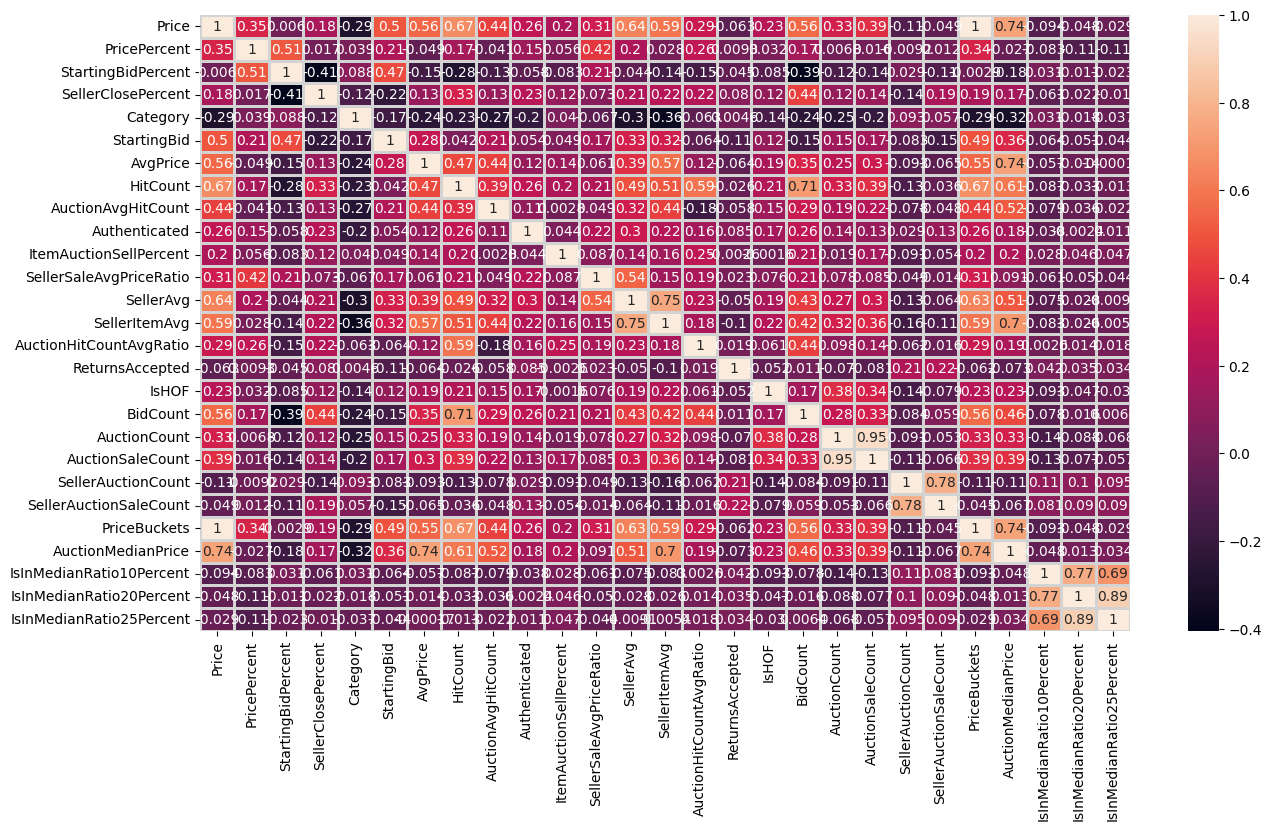

In [ ]:
# Display Correlation matrix only for the numerical variables
plt.figure(figsize = (15, 8))
sns.heatmap(df_sub.select_dtypes(include='number').corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

- Multicollinearity is a condition that may occur during regression analysis where two or more independent variables are highly correlated with one another.<br> While the strength of a regression model improves with increasing correlation between the predictors and the dependent variable, the presence of strong correlations among the <br> independent variables can have a detrimental effect on model explainability and predictor standard error.

- A quick way to identify potential multicollinearity is to review the correlation matrix for the predictor variables.<br> A correlation coefficient with an absolute value > 0.7 typically indicates a strong correlation between predictor variables

# Pearson 's correlation outcome.
- SellerAvg and SellerItemAvg are highly (positive) correlated (correlation = + 0.75).

- AuctionCount and AuctionSaleCount are highly (positive) correlated (correlation = + 0.95).

- IsInMedianRatio20Percent and	IsInMedianRatio25Percent are highly (positive) correlated (correlation = + 0.89).

- IsInMedianRatio10Percent and	IsInMedianRatio20Percent are highly (positive) correlated (correlation = + 0.77).

- IsInMedianRatio10Percent and	IsInMedianRatio25Percent are highly (positive) correlated (correlation = + 0.69).

- PriceBuckets and AuctionMedianPrice are highly (positive) correlated (correlation = + 0.74).

- AuctionMedianPrice and AvgPrice are highly (positive) correlated (correlation = + 0.74).

- BidCount and Hitcount are highly (positive) correlated (correlation = + 0.71).

- SellerAuctionSaleCount and SellerAuctionCount highly (positive) correlated (correlation = + 0.74).

- SellerItemAvg and AuctionMedianPrice highly (positive) correlated (correlation = + 0.7).

The presence of these correlations suggest that multicollinearity among some predictors may be present but further analysis is needed.

# Variance Inflation Factors (VIF)
VIF = 1: No correlation between the predictor variable and other variables. <br>
1 < VIF < 5: Moderate correlation; generally acceptable. <br>
VIF ≥ 5: Indicates potentially problematic multicollinearity.<br>
VIF ≥ 10: Indicates serious multicollinearity.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_sub.select_dtypes(include='number')
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

                     feature          VIF
22              PriceBuckets  1345.528575
0                      Price  1289.397040
18              AuctionCount    20.051670
19          AuctionSaleCount    19.676789
25  IsInMedianRatio20Percent     9.830031
13             SellerItemAvg     8.663001
26  IsInMedianRatio25Percent     8.247862
12                 SellerAvg     7.865771
7                   HitCount     7.610632
3         SellerClosePercent     7.180447
23        AuctionMedianPrice     7.064469
11   SellerSaleAvgPriceRatio     6.786727
10    ItemAuctionSellPercent     5.969058
1               PricePercent     5.596466
17                  BidCount     5.332951
8         AuctionAvgHitCount     5.113811
21    SellerAuctionSaleCount     4.846641
4                   Category     4.594203
14   AuctionHitCountAvgRatio     4.585152
20        SellerAuctionCount     4.492339
2         StartingBidPercent     4.219058
5                StartingBid     3.460827
24  IsInMedianRatio10Percent     3

As we can see from the above the Independent variables:
- PriceBuckets VIF = 1345.528575
- AuctionCount VIF = 20.051670
- AuctionSaleCount VIF = 19.676789

These indicates extreme multicollinearity and these features are almost linearly dependent on others. <br>
In order to improve model 's interpretability and stability in and i will remove these features (PriceBuckets,AuctionCount,AuctionSaleCount).

In [37]:
# Drop the multicollinearity variables
df_sub = df_sub.drop(columns=["PriceBuckets",'AuctionCount','AuctionSaleCount'],axis=1)

In [ ]:
# Shape after dimensionality reduction
df_sub.shape

(89124, 25)

# EDA

In [ ]:
# Extracting discrete_numerical and continuous_numerical , categorical
discrete_numerical = [
    "Authenticated",
    "ReturnsAccepted",
    "IsHOF",
    "IsInMedianRatio10Percent",
    "IsInMedianRatio20Percent",
    "IsInMedianRatio25Percent",
]

continuous_numerical = [
    "Price",
    "PricePercent",
    "StartingBidPercent",
    "SellerClosePercent",
    "StartingBid",
    "HitCount",
    "AvgPrice",
    "AuctionAvgHitCount",
    "ItemAuctionSellPercent",
    "SellerSaleAvgPriceRatio",
    "AuctionHitCountAvgRatio",
    "AuctionMedianPrice",
    "Category",
    "SellerAvg",
    "SellerItemAvg",
    "BidCount",
    "SellerAuctionCount",
    "SellerAuctionSaleCount"
]

categorical = [
    "EndDay"
]

In [23]:
print(len(discrete_numerical))
print(len(continuous_numerical))
print(len(categorical))

6
20
2


In [24]:
df_sub.head()

,Price,PricePercent,StartingBidPercent,SellerClosePercent,Category,StartingBid,AvgPrice,EndDay,HitCount,AuctionAvgHitCount,Authenticated,ItemAuctionSellPercent,SellerSaleAvgPriceRatio,SellerAvg,SellerItemAvg,AuctionHitCountAvgRatio,ReturnsAccepted,IsHOF,BidCount,AuctionCount,AuctionSaleCount,SellerAuctionCount,SellerAuctionSaleCount,PriceBuckets,AuctionMedianPrice,IsInMedianRatio10Percent,IsInMedianRatio20Percent,IsInMedianRatio25Percent
0,7.99,0.9038,0.9038,0.152542,73396,7.99,8.8400,Friday,4,3,0,0.600000,0.52,6,12,1.333333,0,0,1,5,3,59,9,10,7.99,1,1,1
1,0.99,1.0000,1.0000,0.107143,53,0.99,0.9900,Friday,11,11,0,1.000000,0.52,2,4,1.000000,0,0,1,1,1,616,66,5,0.99,1,1,1
2,14.99,0.2814,0.2814,0.380952,27260,14.99,53.2615,Thursday,25,102,0,0.411765,0.45,8,18,0.245098,0,0,1,51,21,84,32,15,26.00,0,0,0
3,10.50,0.5070,0.2892,0.333333,27265,5.99,20.7066,Friday,67,63,0,0.321429,1.27,43,46,1.063492,1,0,2,28,9,204,68,15,15.25,0,0,0
4,43.88,0.8970,0.0202,0.995726,27277,0.99,48.9142,Wednesday,32,84,0,0.904762,0.88,78,89,0.380952,1,0,10,21,19,1638,1631,45,45.88,1,1,1


Step 1: Univariate Analysis

Discrete variables

C:\Users\Xaris\AppData\Local\Temp\ipykernel_13144\2840219058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette=palette)


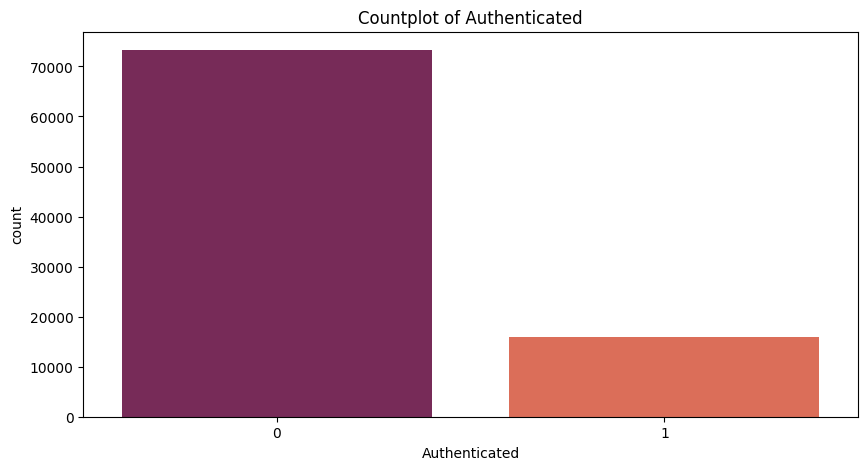

C:\Users\Xaris\AppData\Local\Temp\ipykernel_13144\2840219058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette=palette)


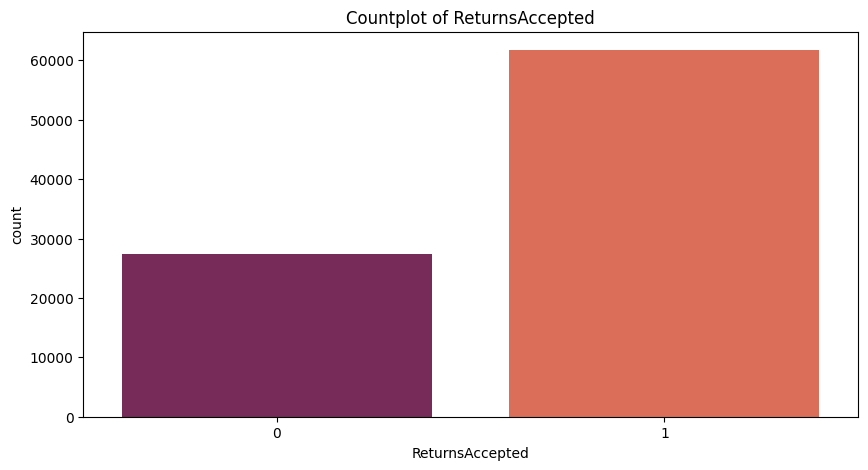

C:\Users\Xaris\AppData\Local\Temp\ipykernel_13144\2840219058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette=palette)


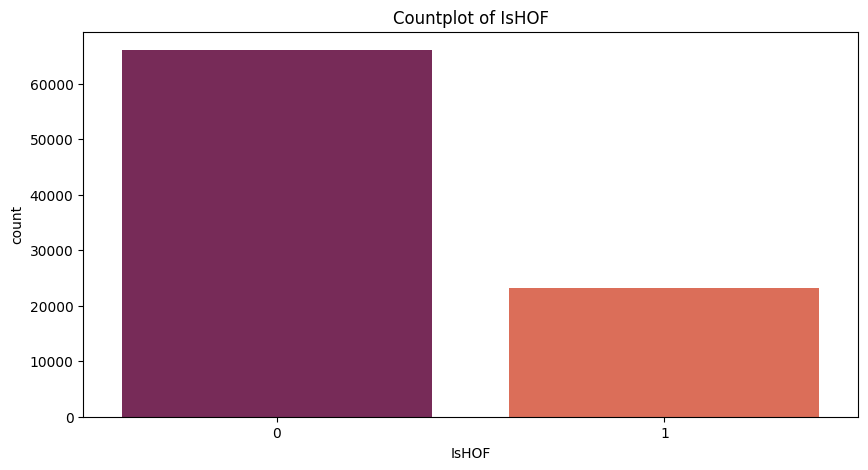

C:\Users\Xaris\AppData\Local\Temp\ipykernel_13144\2840219058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette=palette)


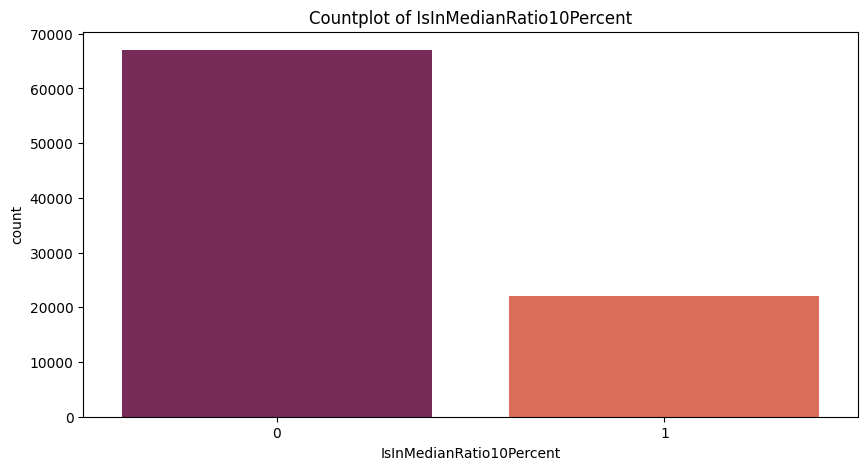

C:\Users\Xaris\AppData\Local\Temp\ipykernel_13144\2840219058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette=palette)


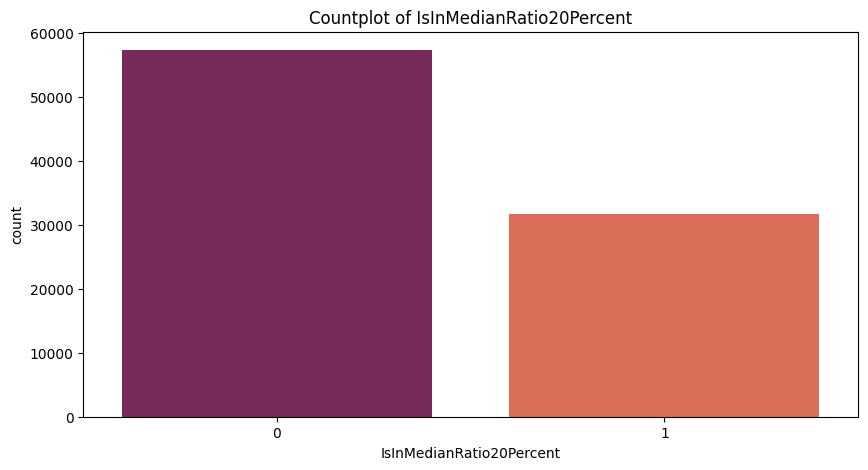

C:\Users\Xaris\AppData\Local\Temp\ipykernel_13144\2840219058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette=palette)


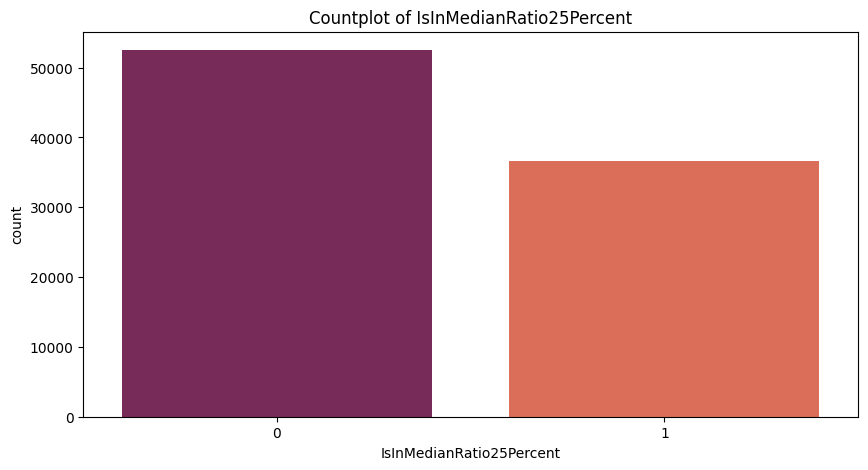

In [25]:
# Looking at categorical / discrete columns
def plot_count(df, column, palette='rocket'):
    plt.figure(figsize=(10,5))
    sns.countplot(x=column, data=df, palette=palette)
    plt.title(f"Countplot of {column}")
    plt.show()

for col in discrete_numerical:   # loop over column names
    print('=============='*3)
    plot_count(df_sub, col)      # pass both DataFrame and column
    print('=============='*3)


The distribution of Authenticated
0    73278
1    15846
Name: count, dtype: int64

------------------------


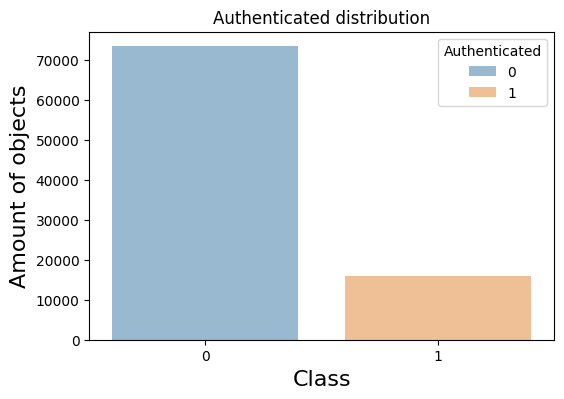

The distribution of ReturnsAccepted
1    61721
0    27403
Name: count, dtype: int64

------------------------


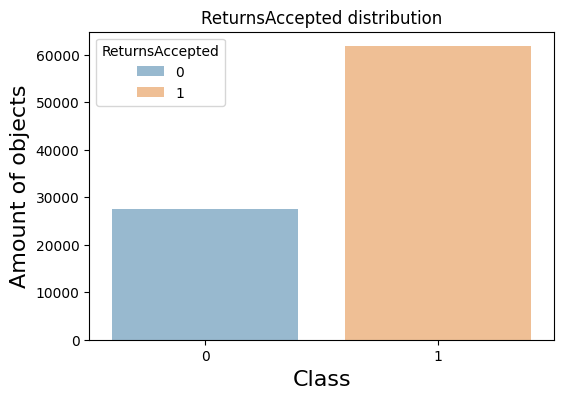

The distribution of IsHOF
0    66026
1    23098
Name: count, dtype: int64

------------------------


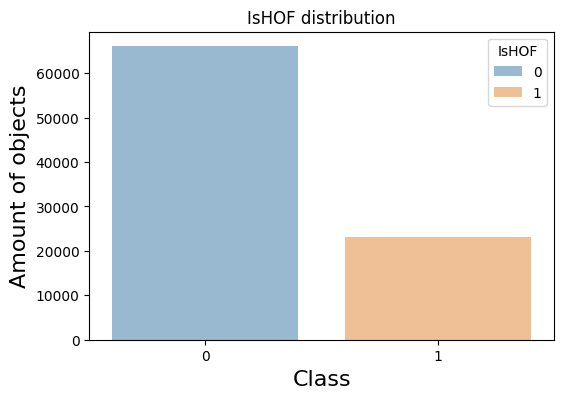

The distribution of IsInMedianRatio10Percent
0    67027
1    22097
Name: count, dtype: int64

------------------------


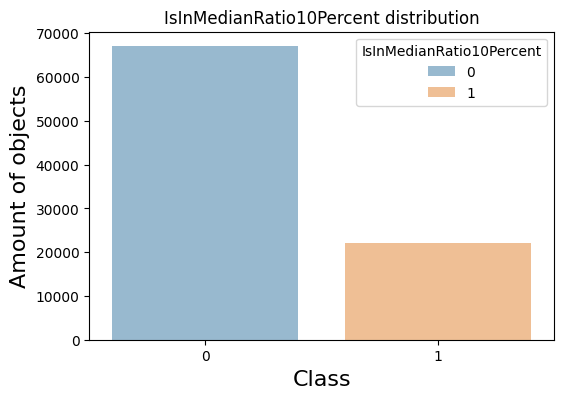

The distribution of IsInMedianRatio20Percent
0    57374
1    31750
Name: count, dtype: int64

------------------------


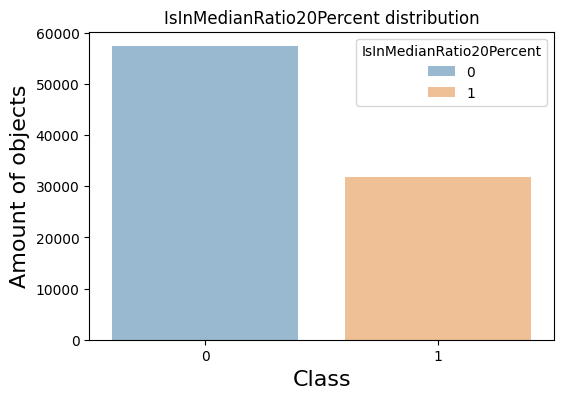

The distribution of IsInMedianRatio25Percent
0    52515
1    36609
Name: count, dtype: int64

------------------------


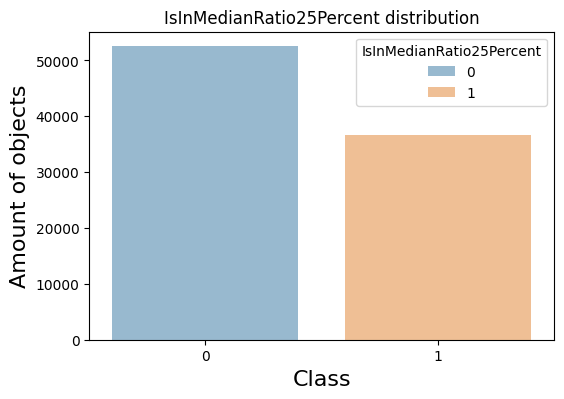

In [ ]:
def summary(col):
    print(f"The distribution of {df_sub[col].value_counts()}\n")
    print('------------------------')
    # Plot this distribution
    plt.figure(figsize=(6,4))
    label_counts = df_sub[col].value_counts().reset_index()
    label_counts.columns = [col, 'Count']
    sns.barplot(data=label_counts, x=col, y='Count', hue= col,alpha=0.5)
    plt.ylabel('Amount of objects', fontsize=16)
    plt.xlabel('Class', fontsize=16)
    plt.title(f"{col} distribution")
    plt.tight_layout
    plt.show();

for i in discrete_numerical:
    print('=============='*3)
    summary(i)
    print('=============='*3)

- Continuous numerical variables

In [ ]:
def plot_hist_box(col, color="mediumspringgreen", figsize=(20,13)):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)

    # Histogram + KDE
    sns.histplot(data=df_sub, x=col, kde=True, color=color, ax=axes[0])
    axes[0].set_title(f"{col} Histogram", fontsize=18)
    axes[0].set_xlabel(None)

    # Boxplot
    sns.boxplot(data=df_sub, x=col, color=color, ax=axes[1])
    axes[1].set_title(f"{col} Boxplot", fontsize=18)
    axes[1].set_xlabel(None)

    plt.tight_layout()
    plt.show()

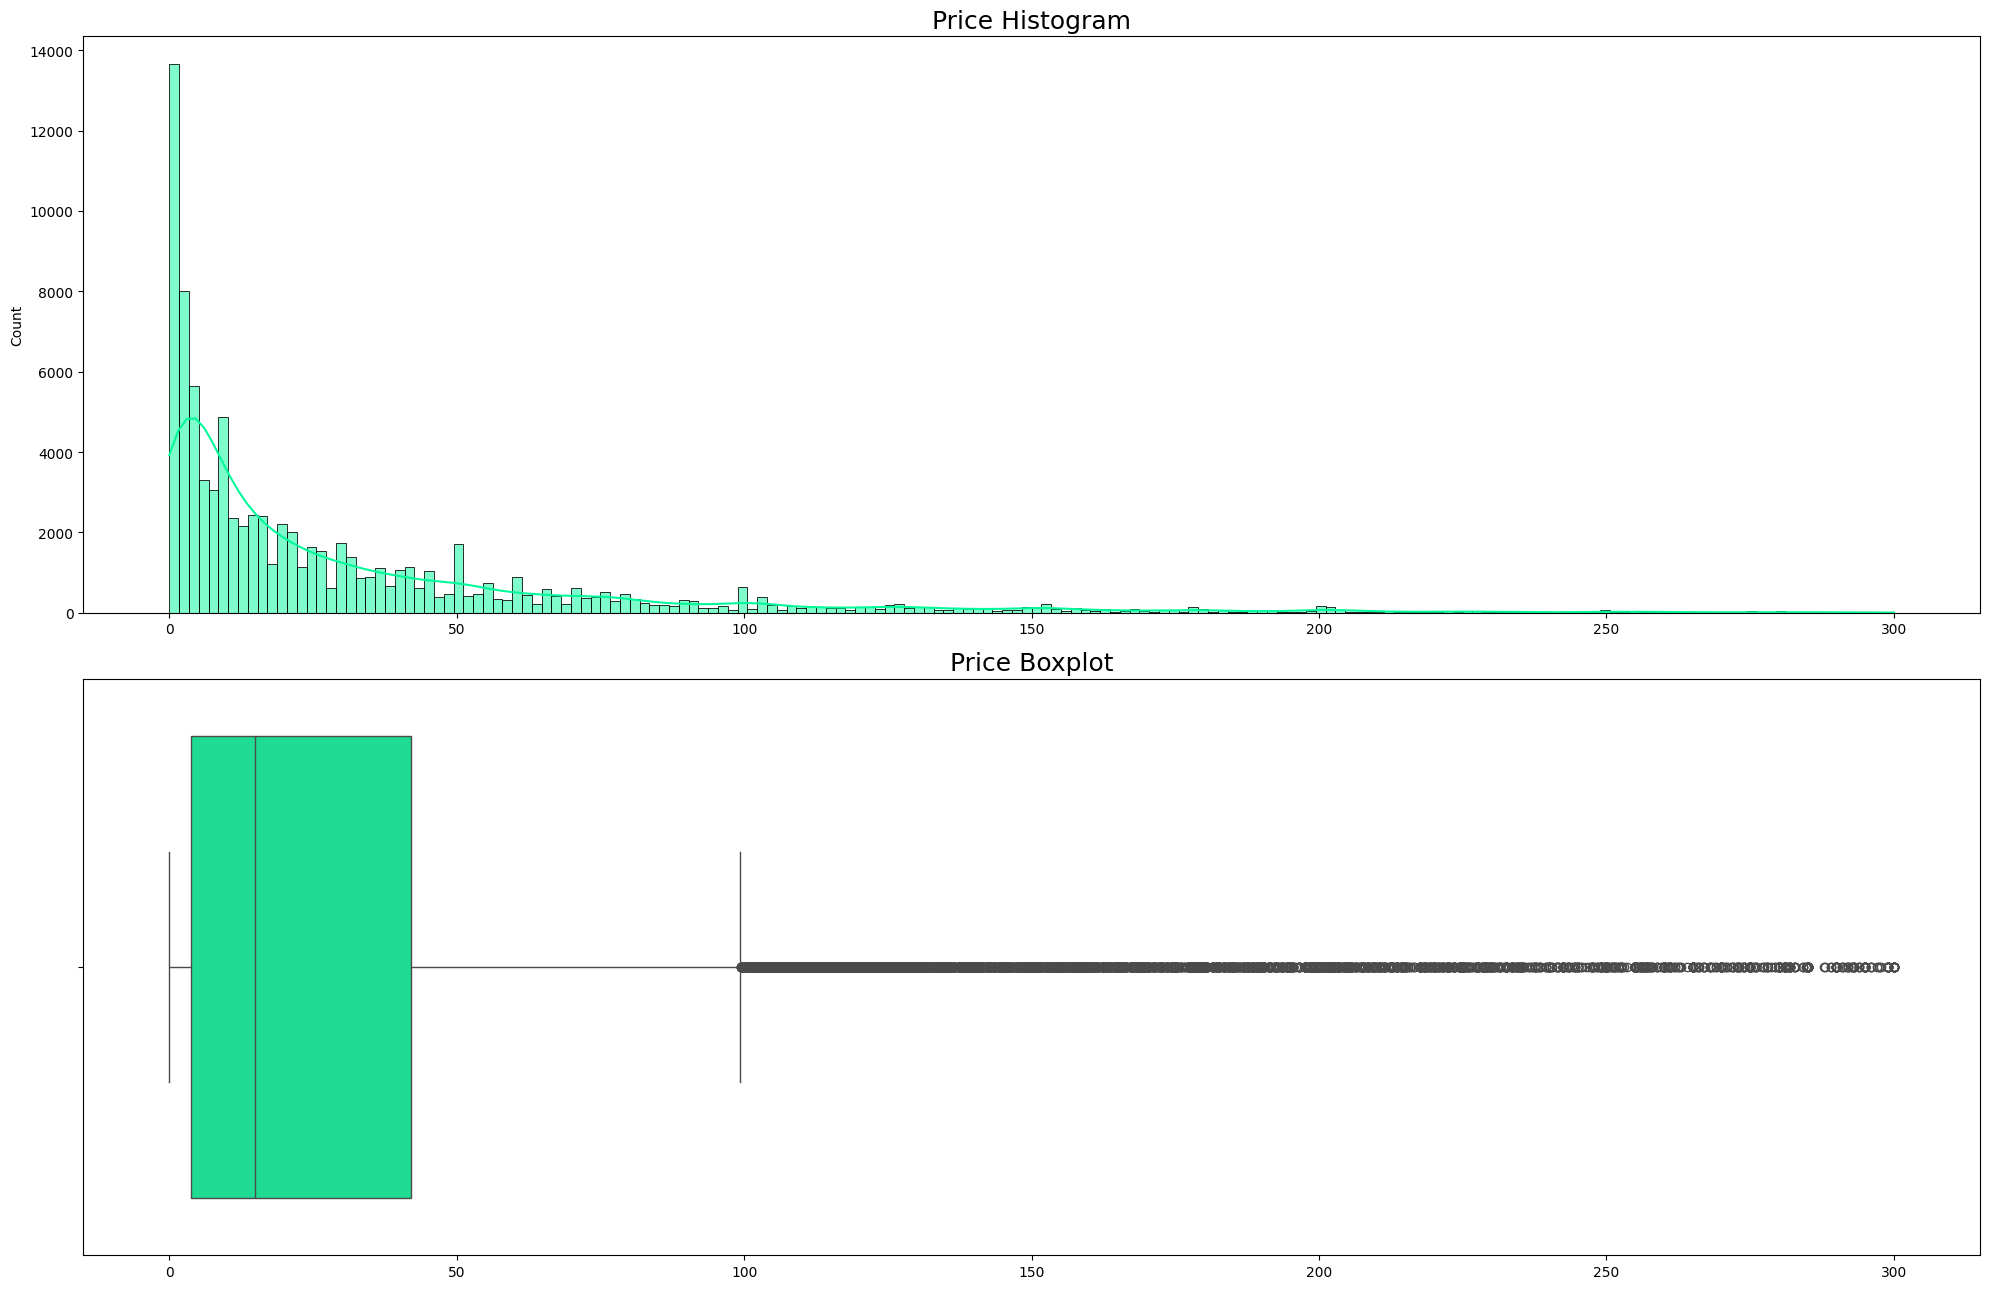

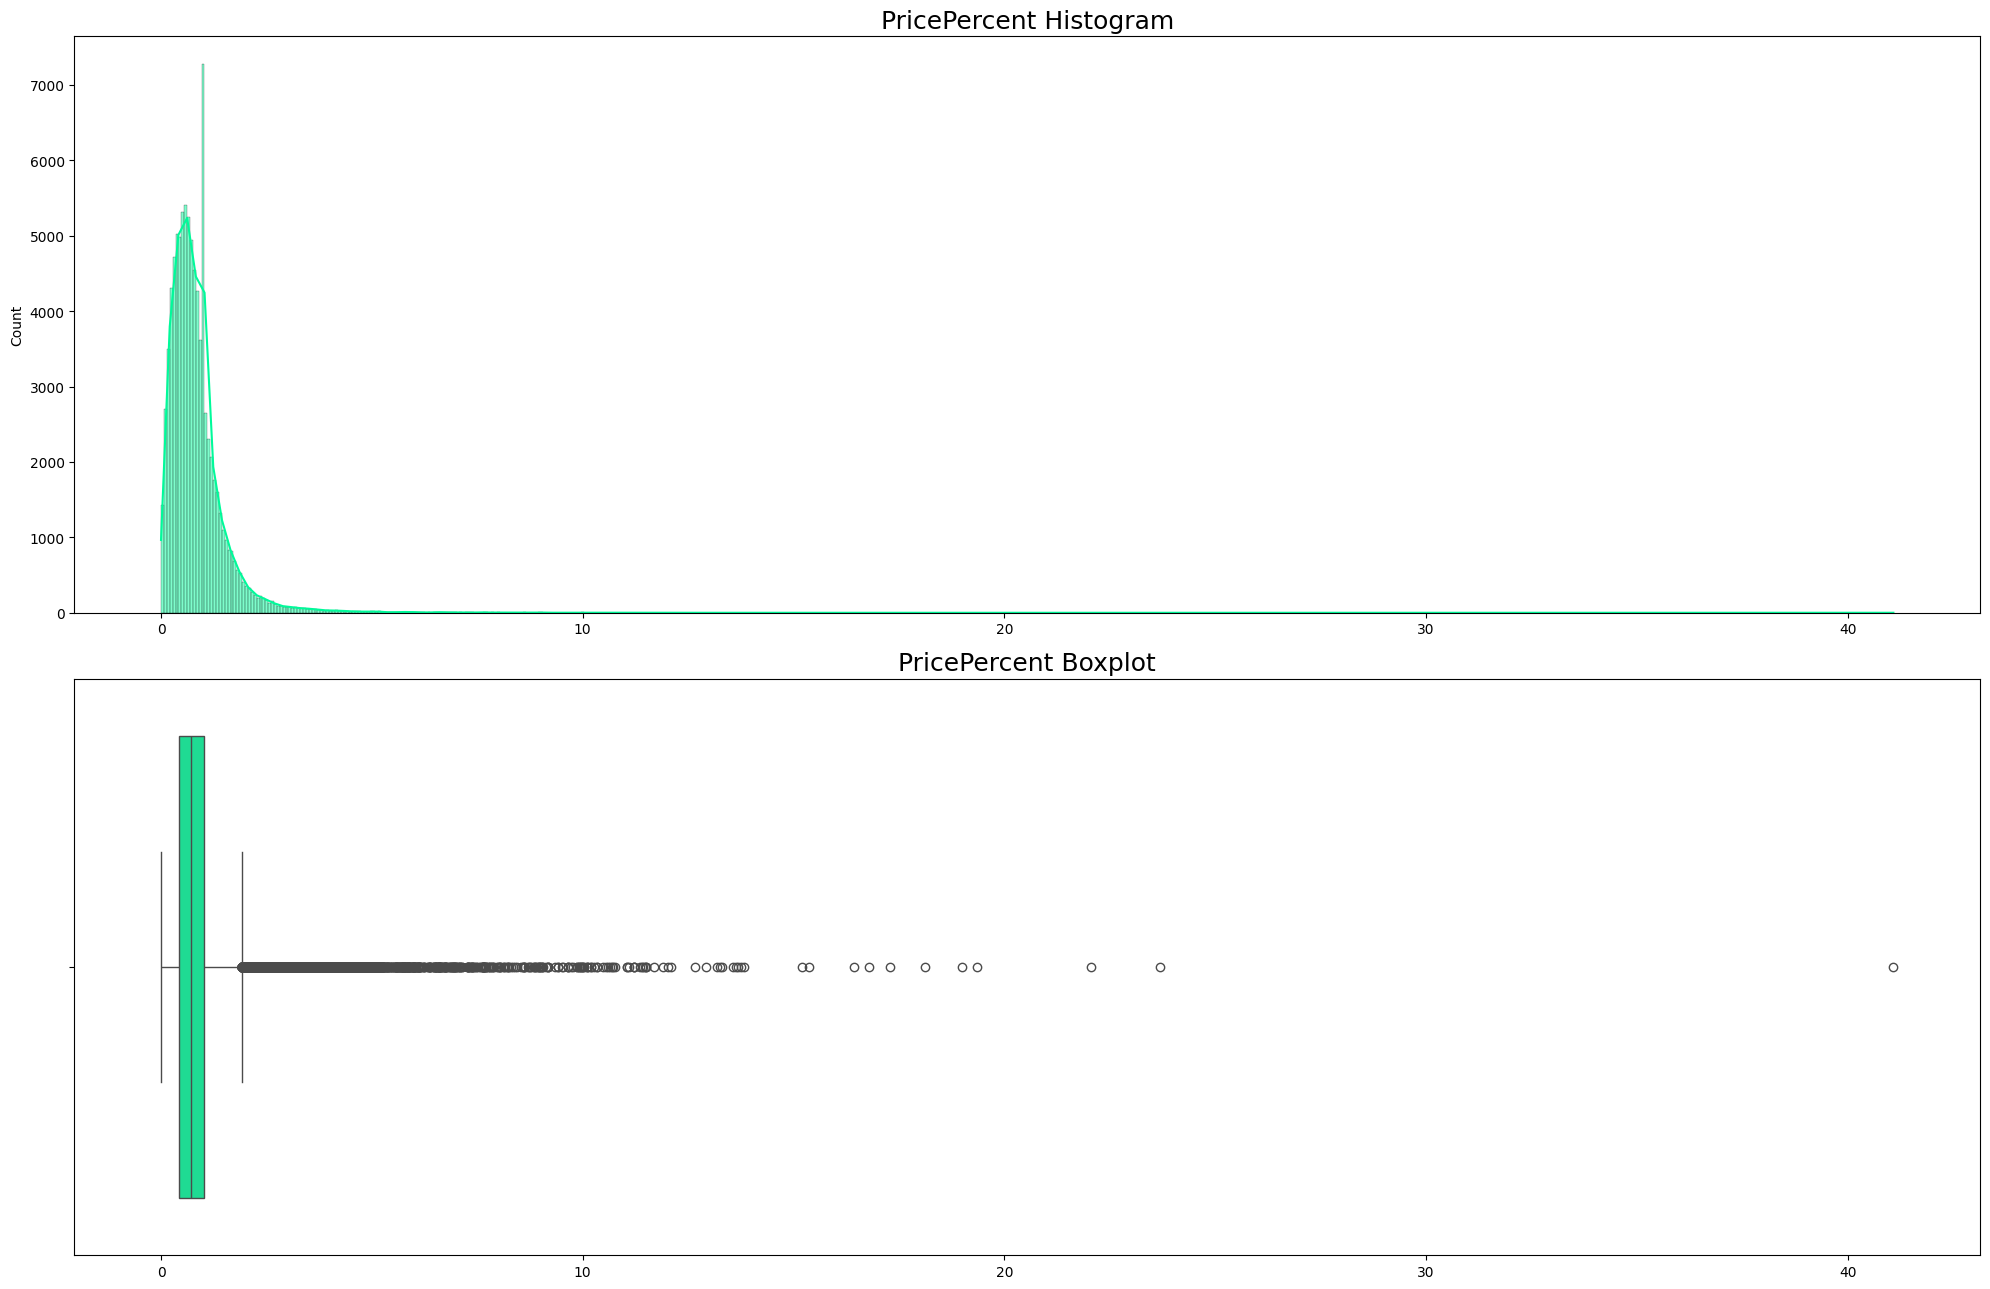

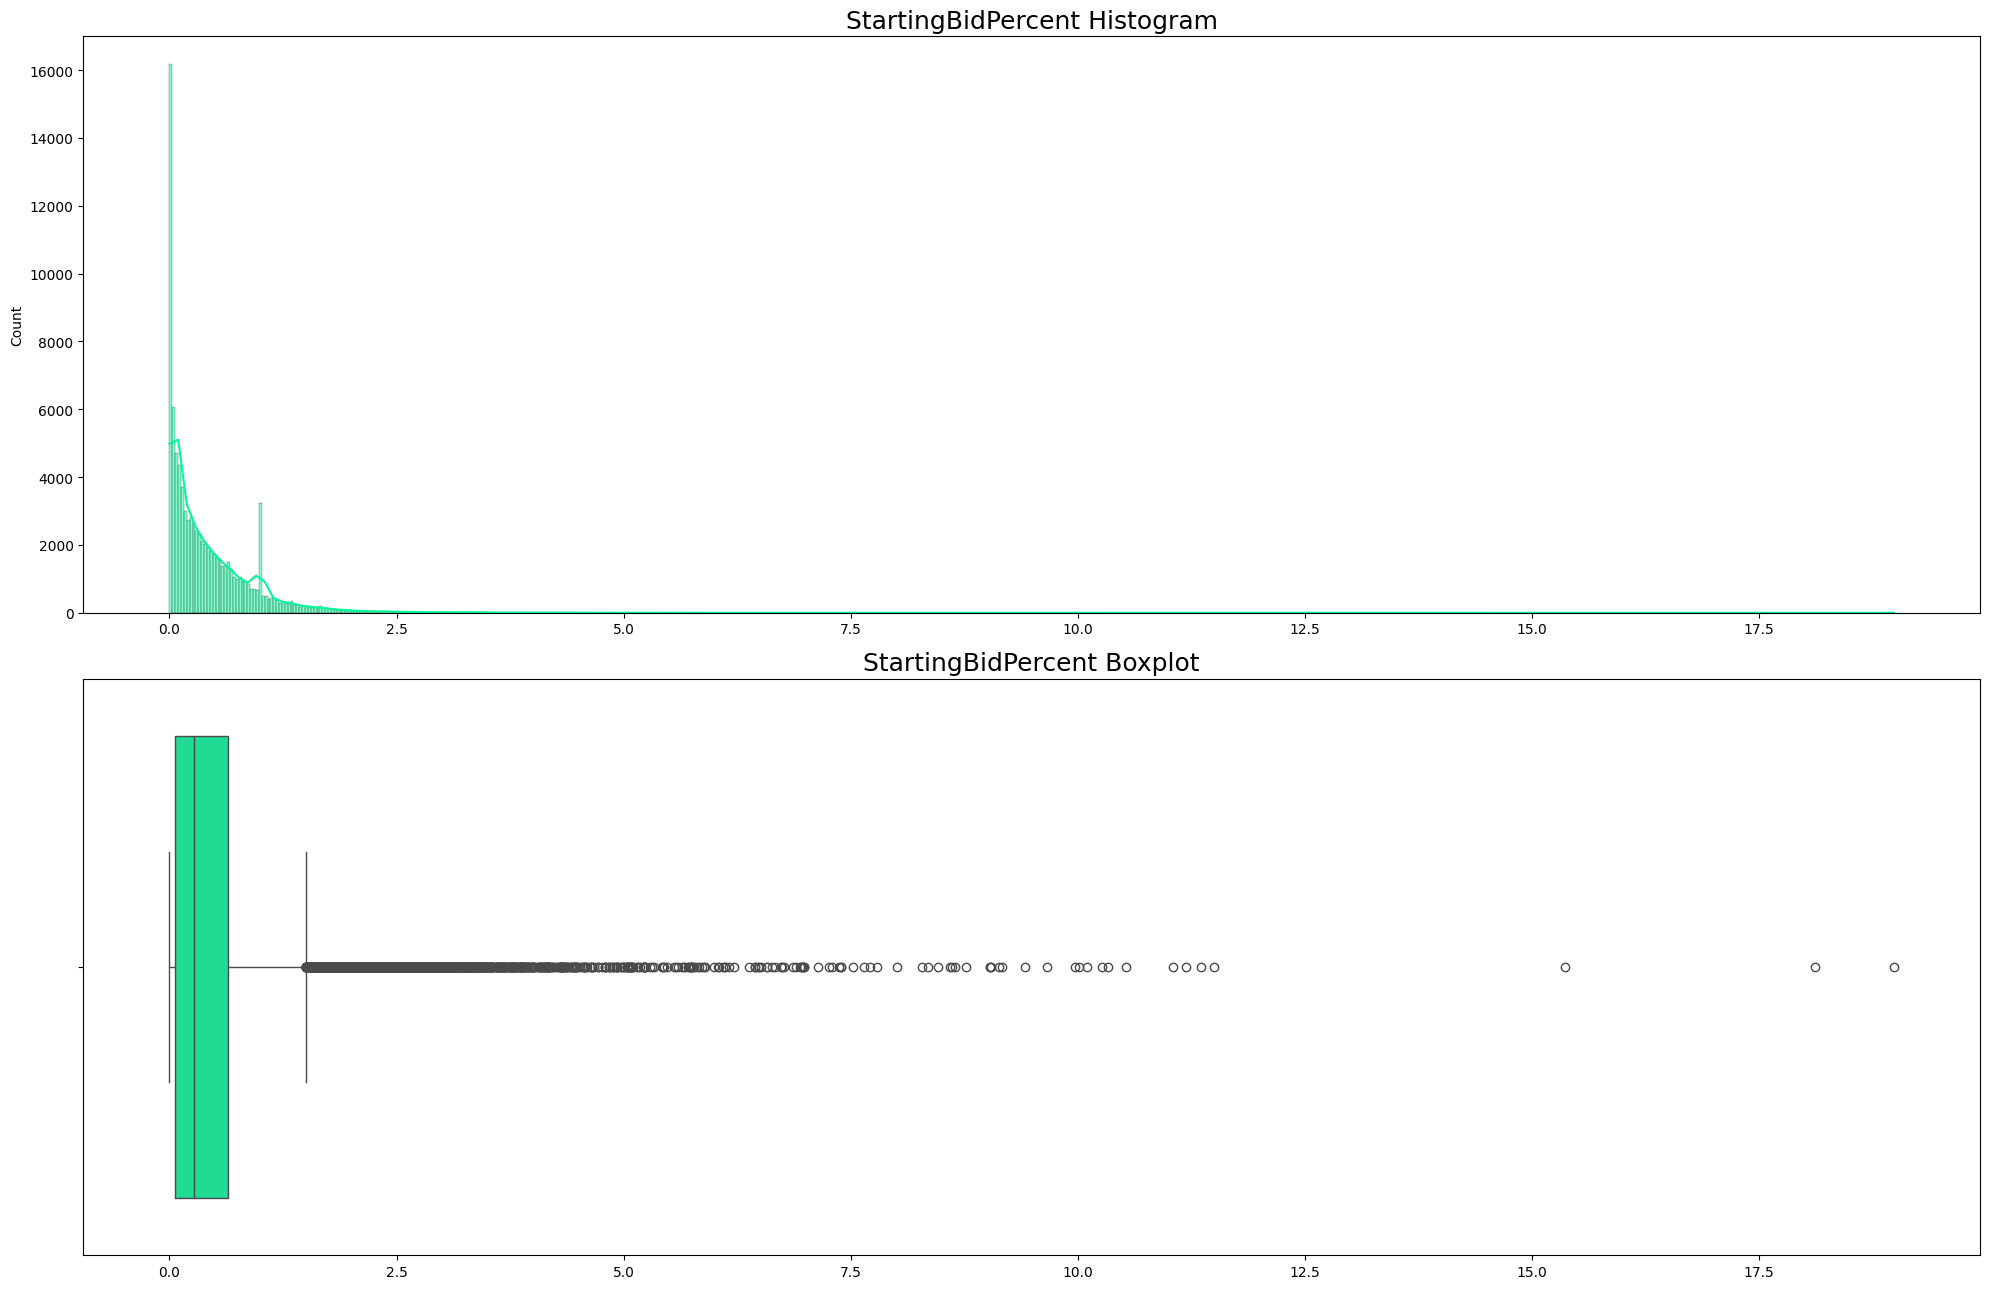

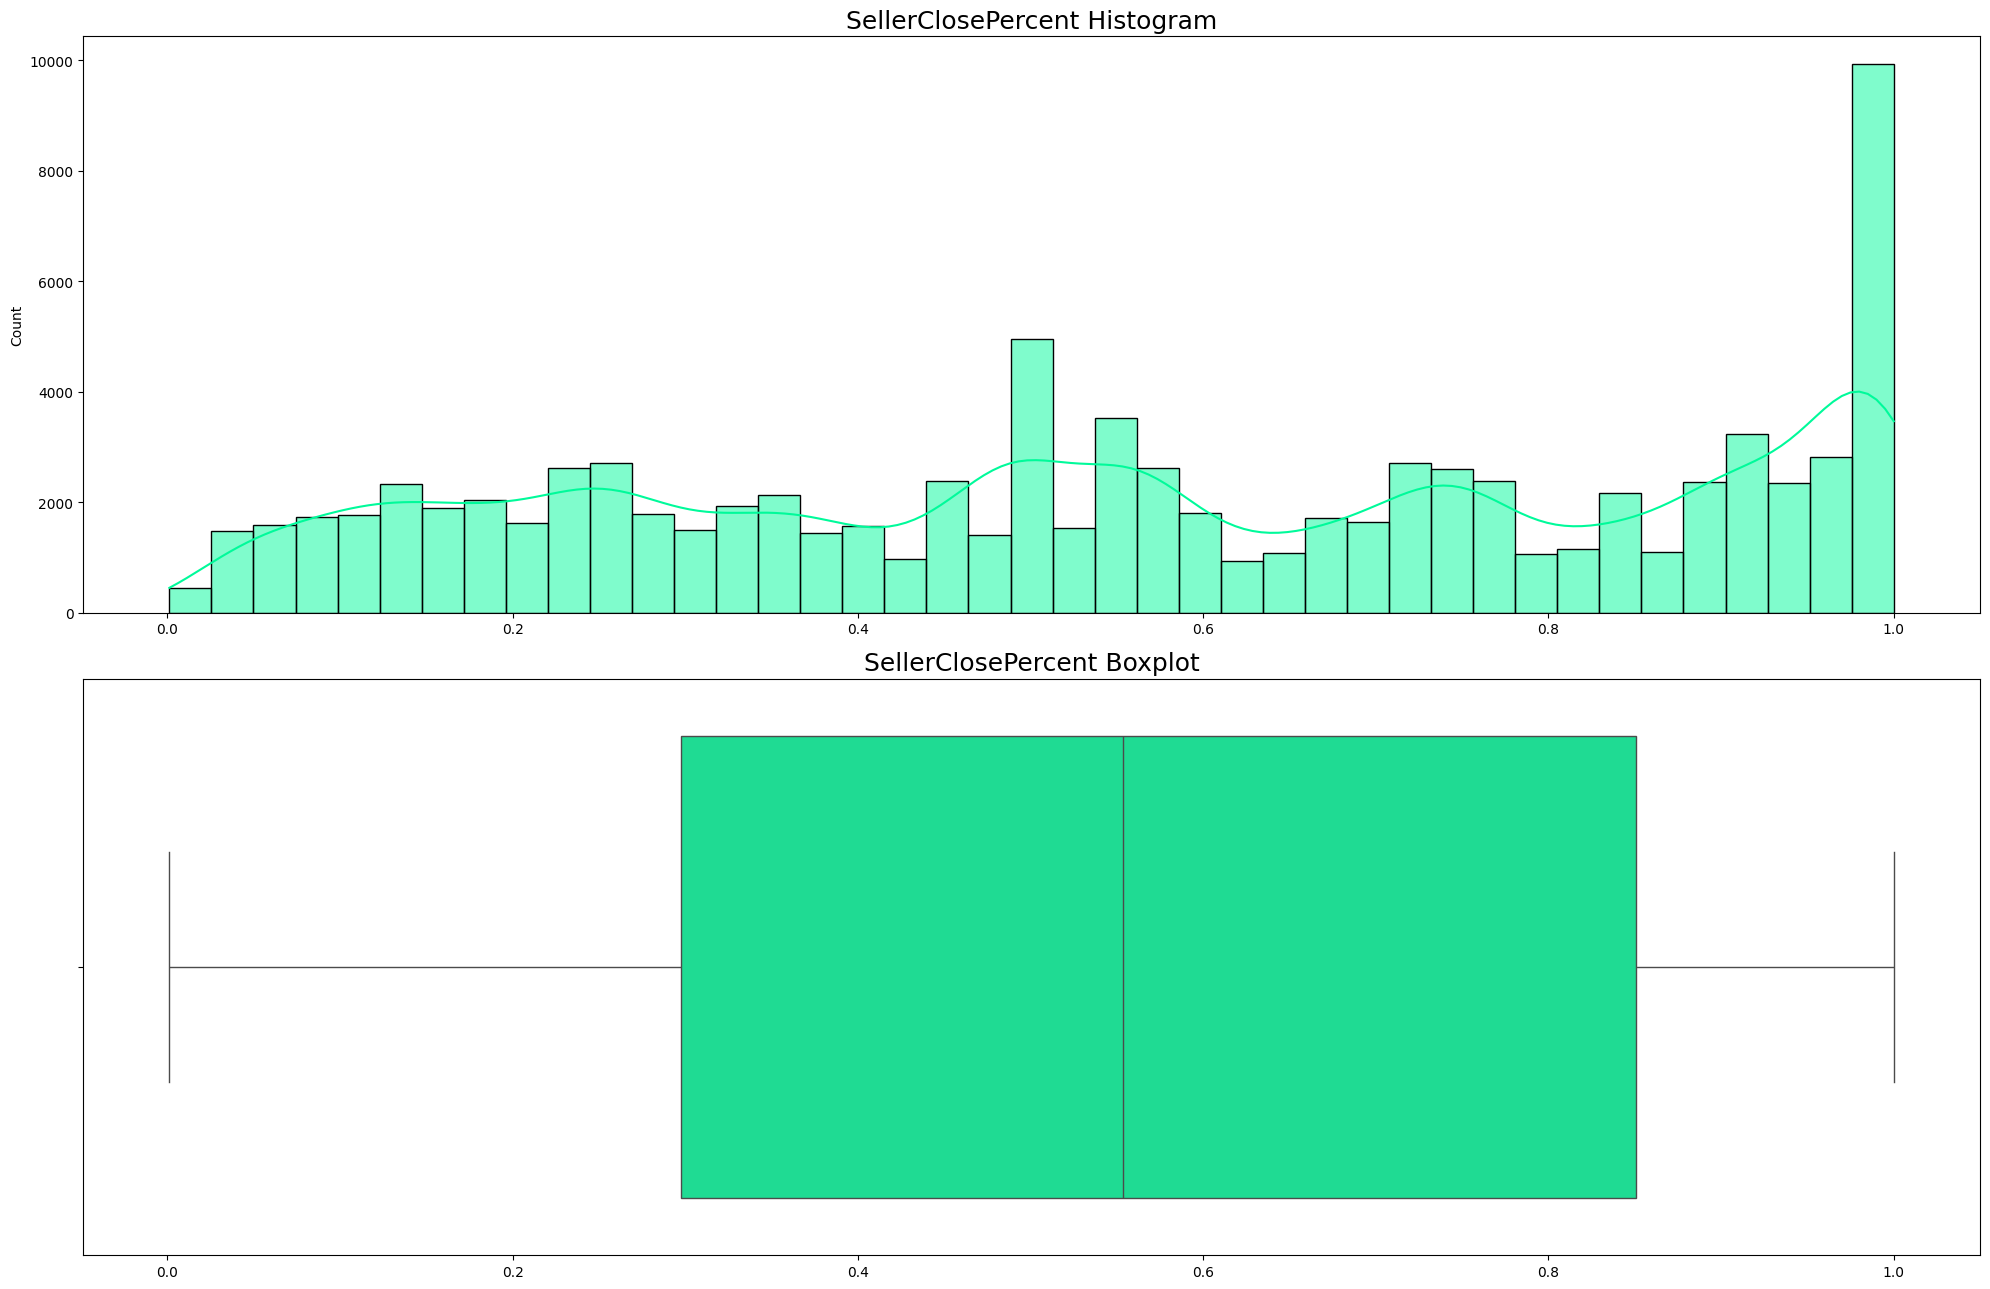

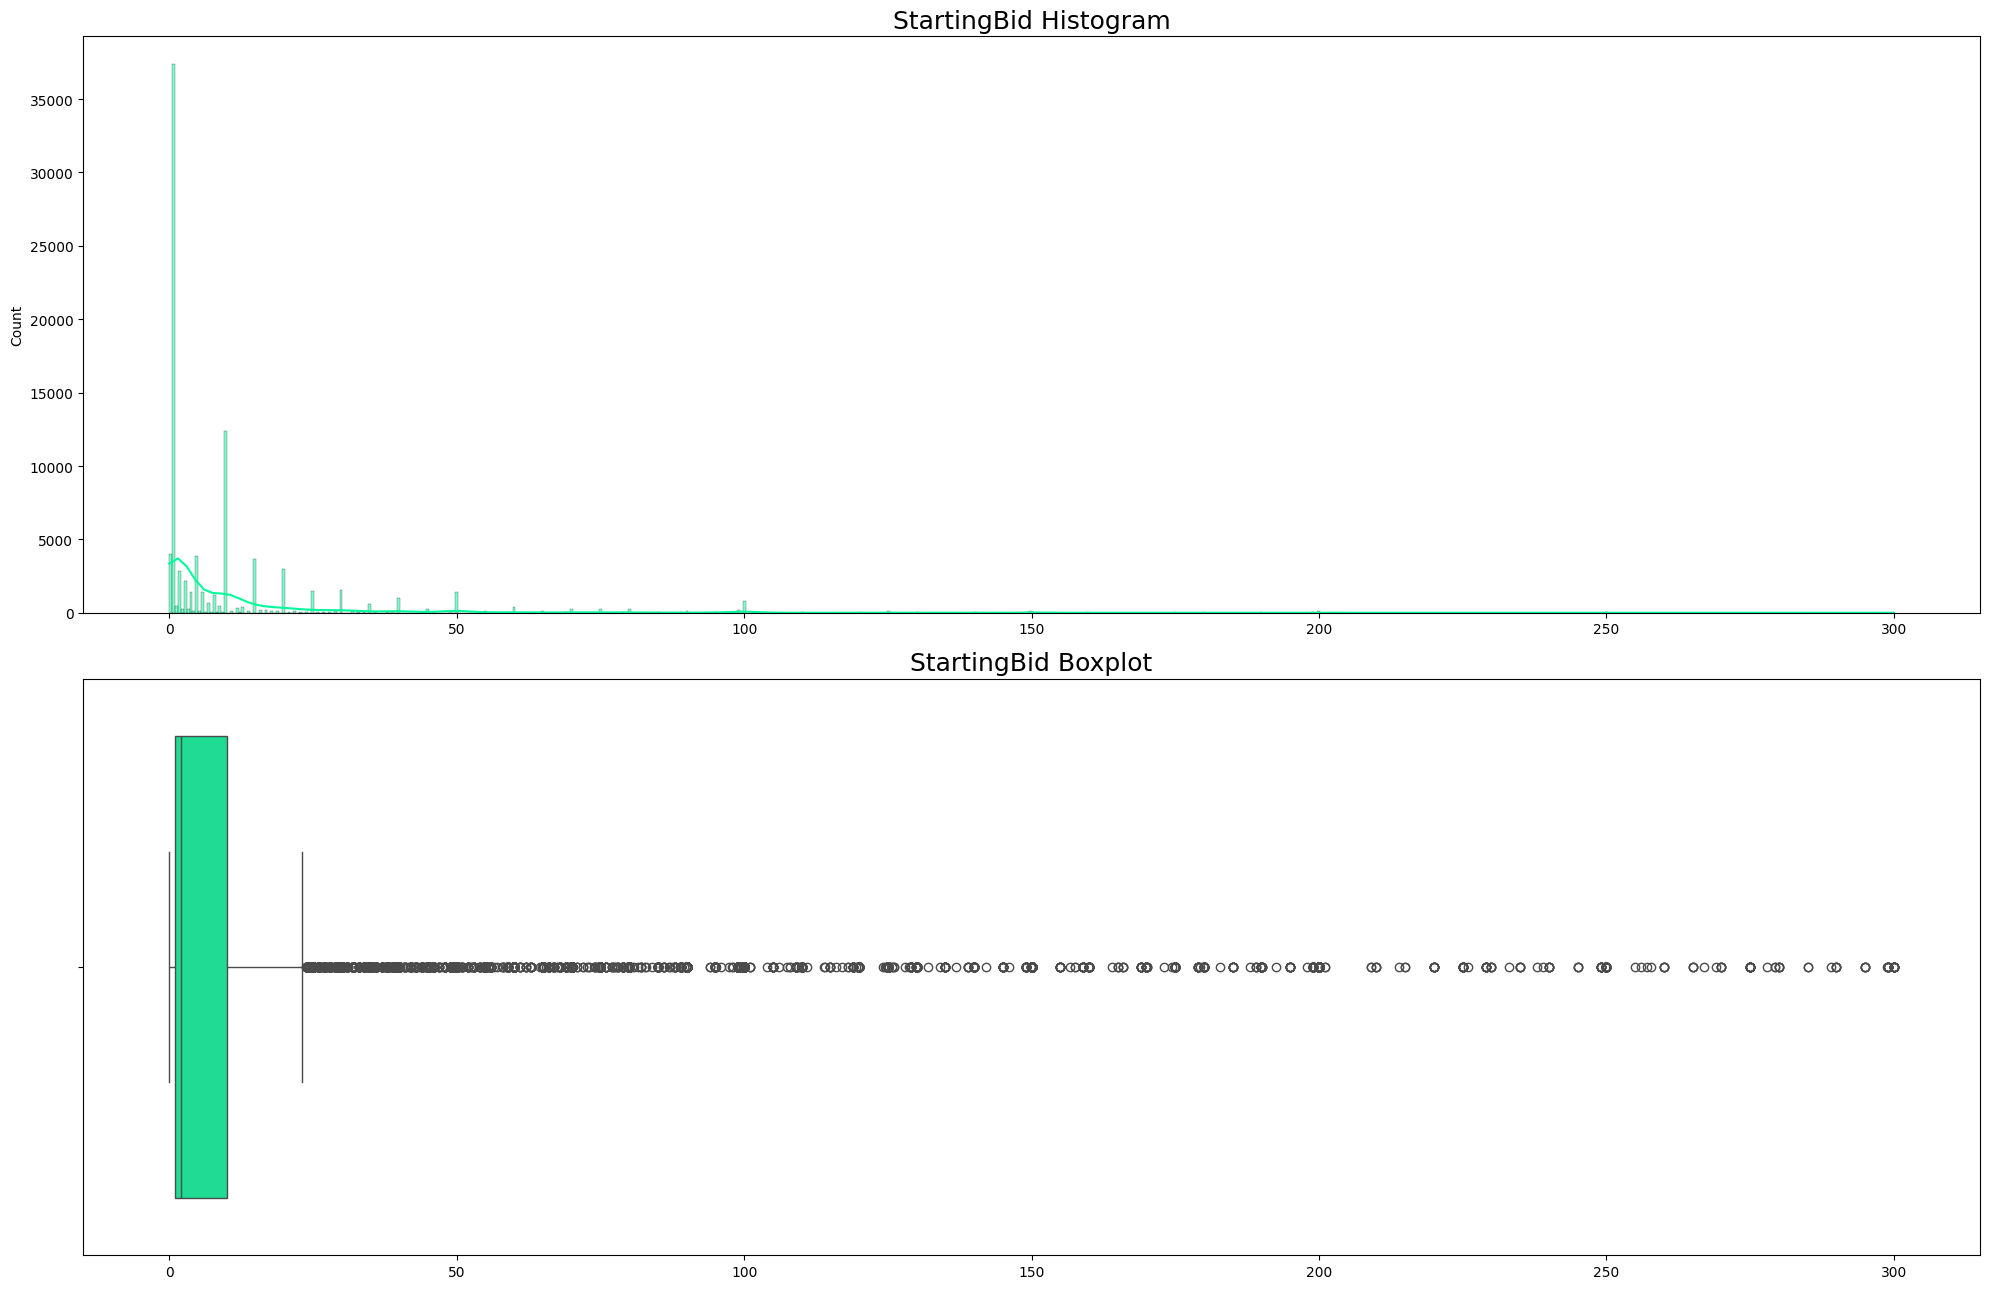

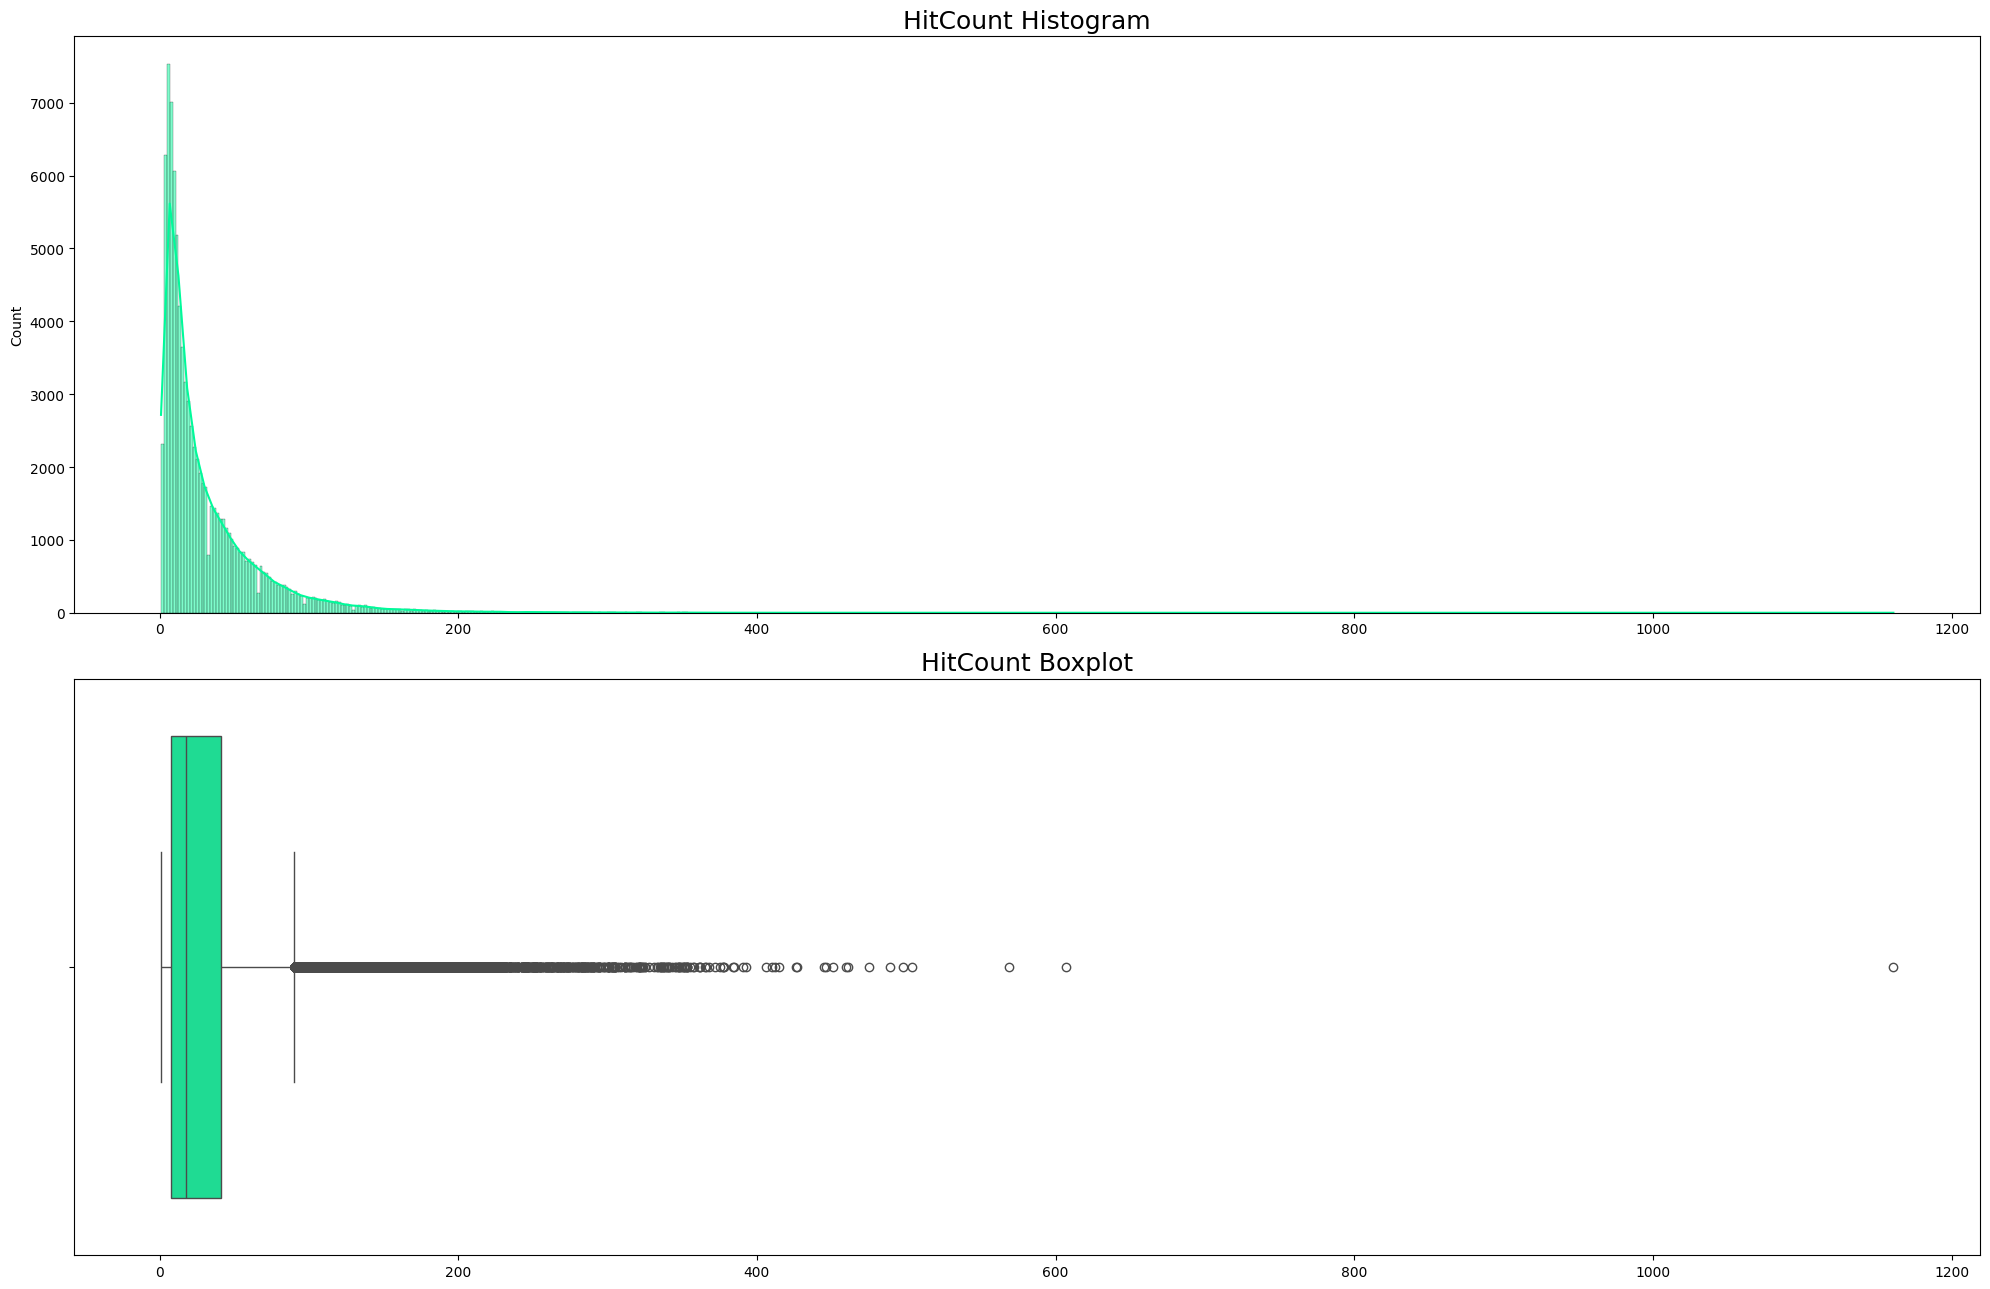

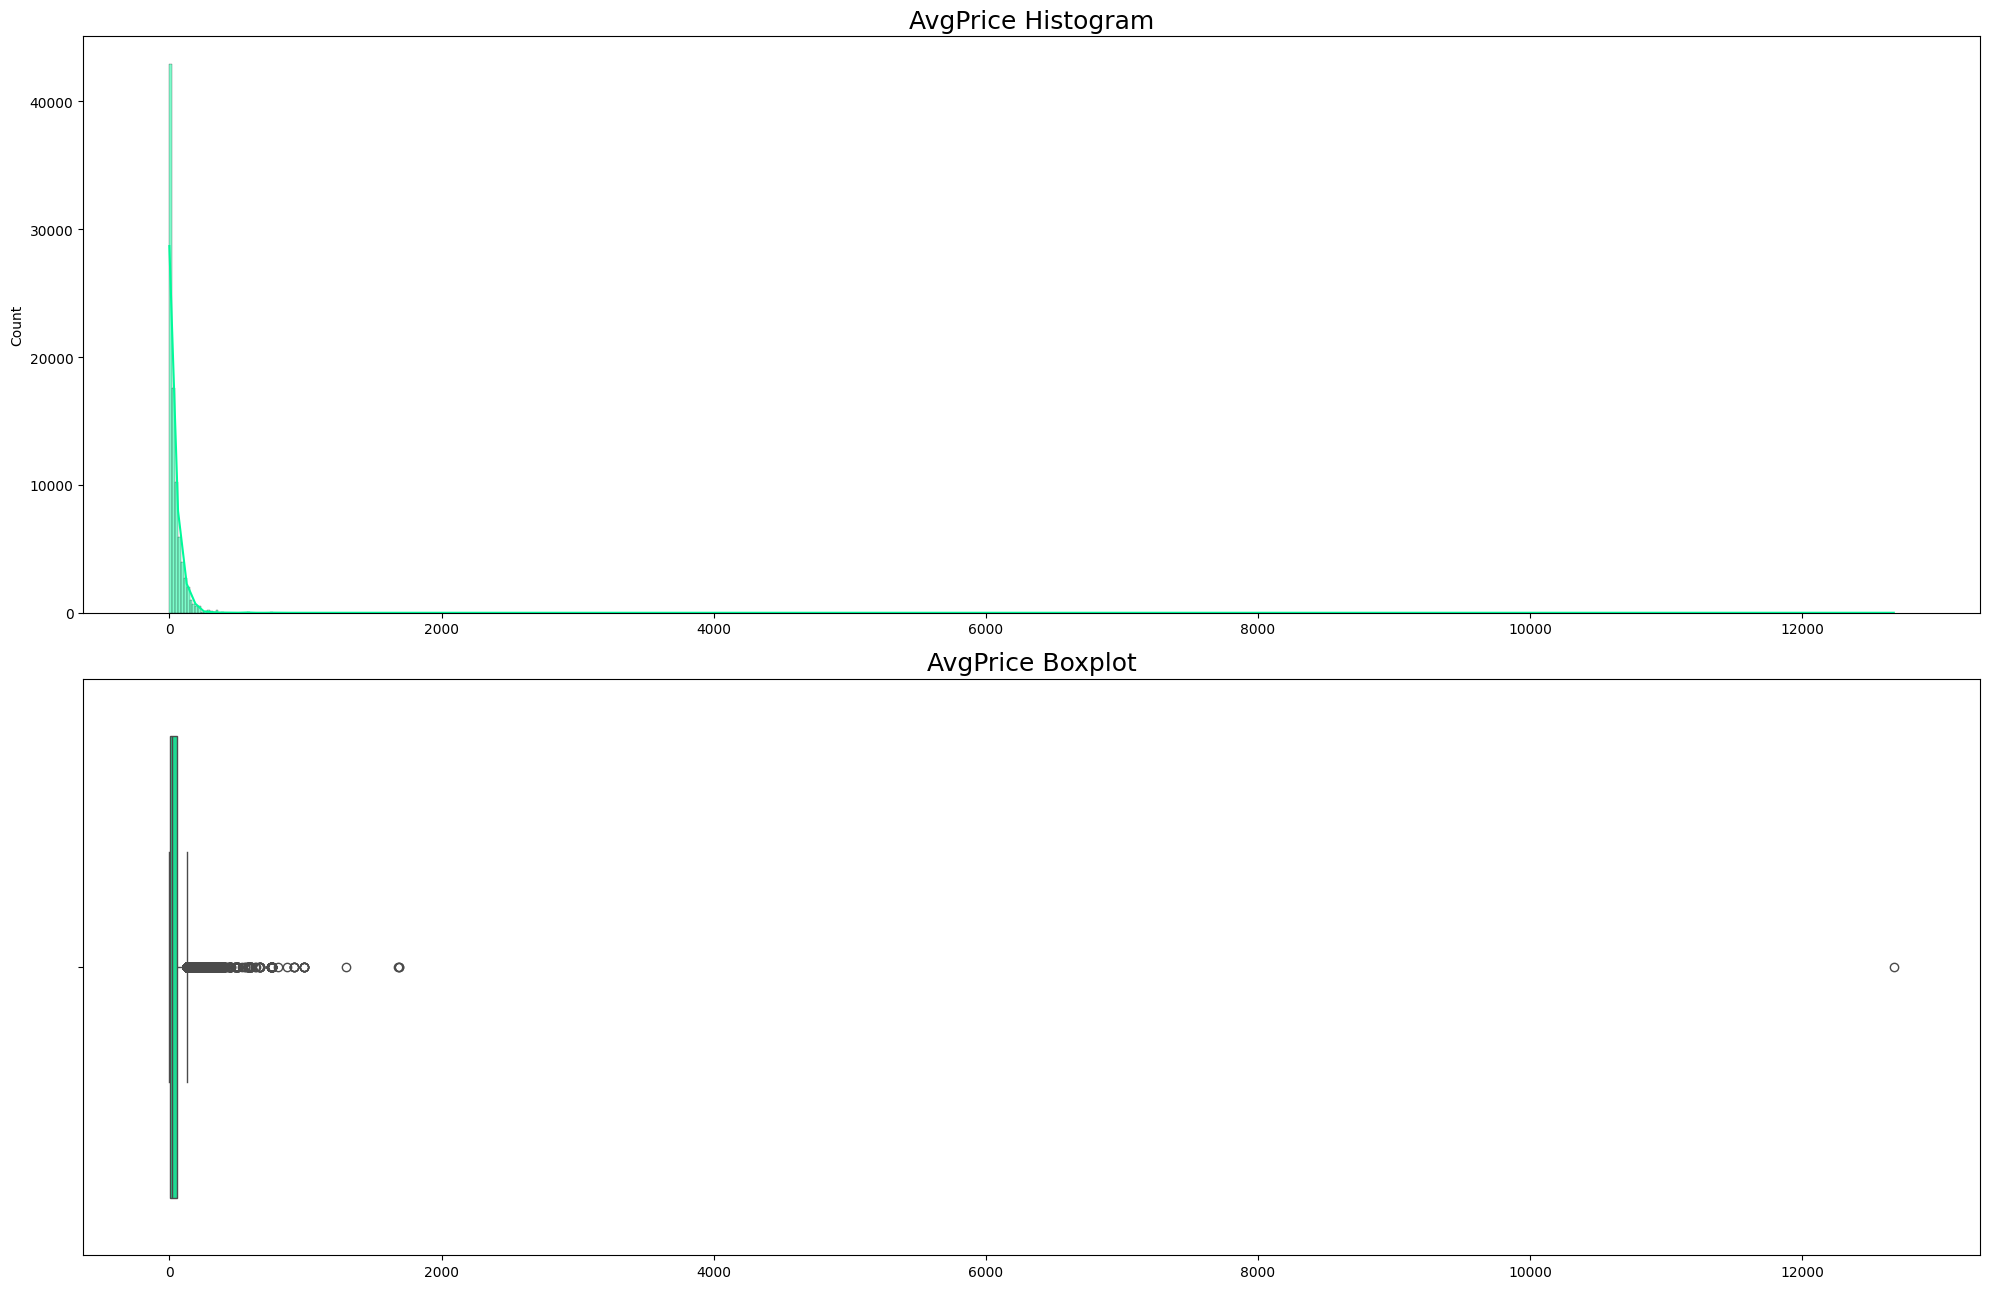

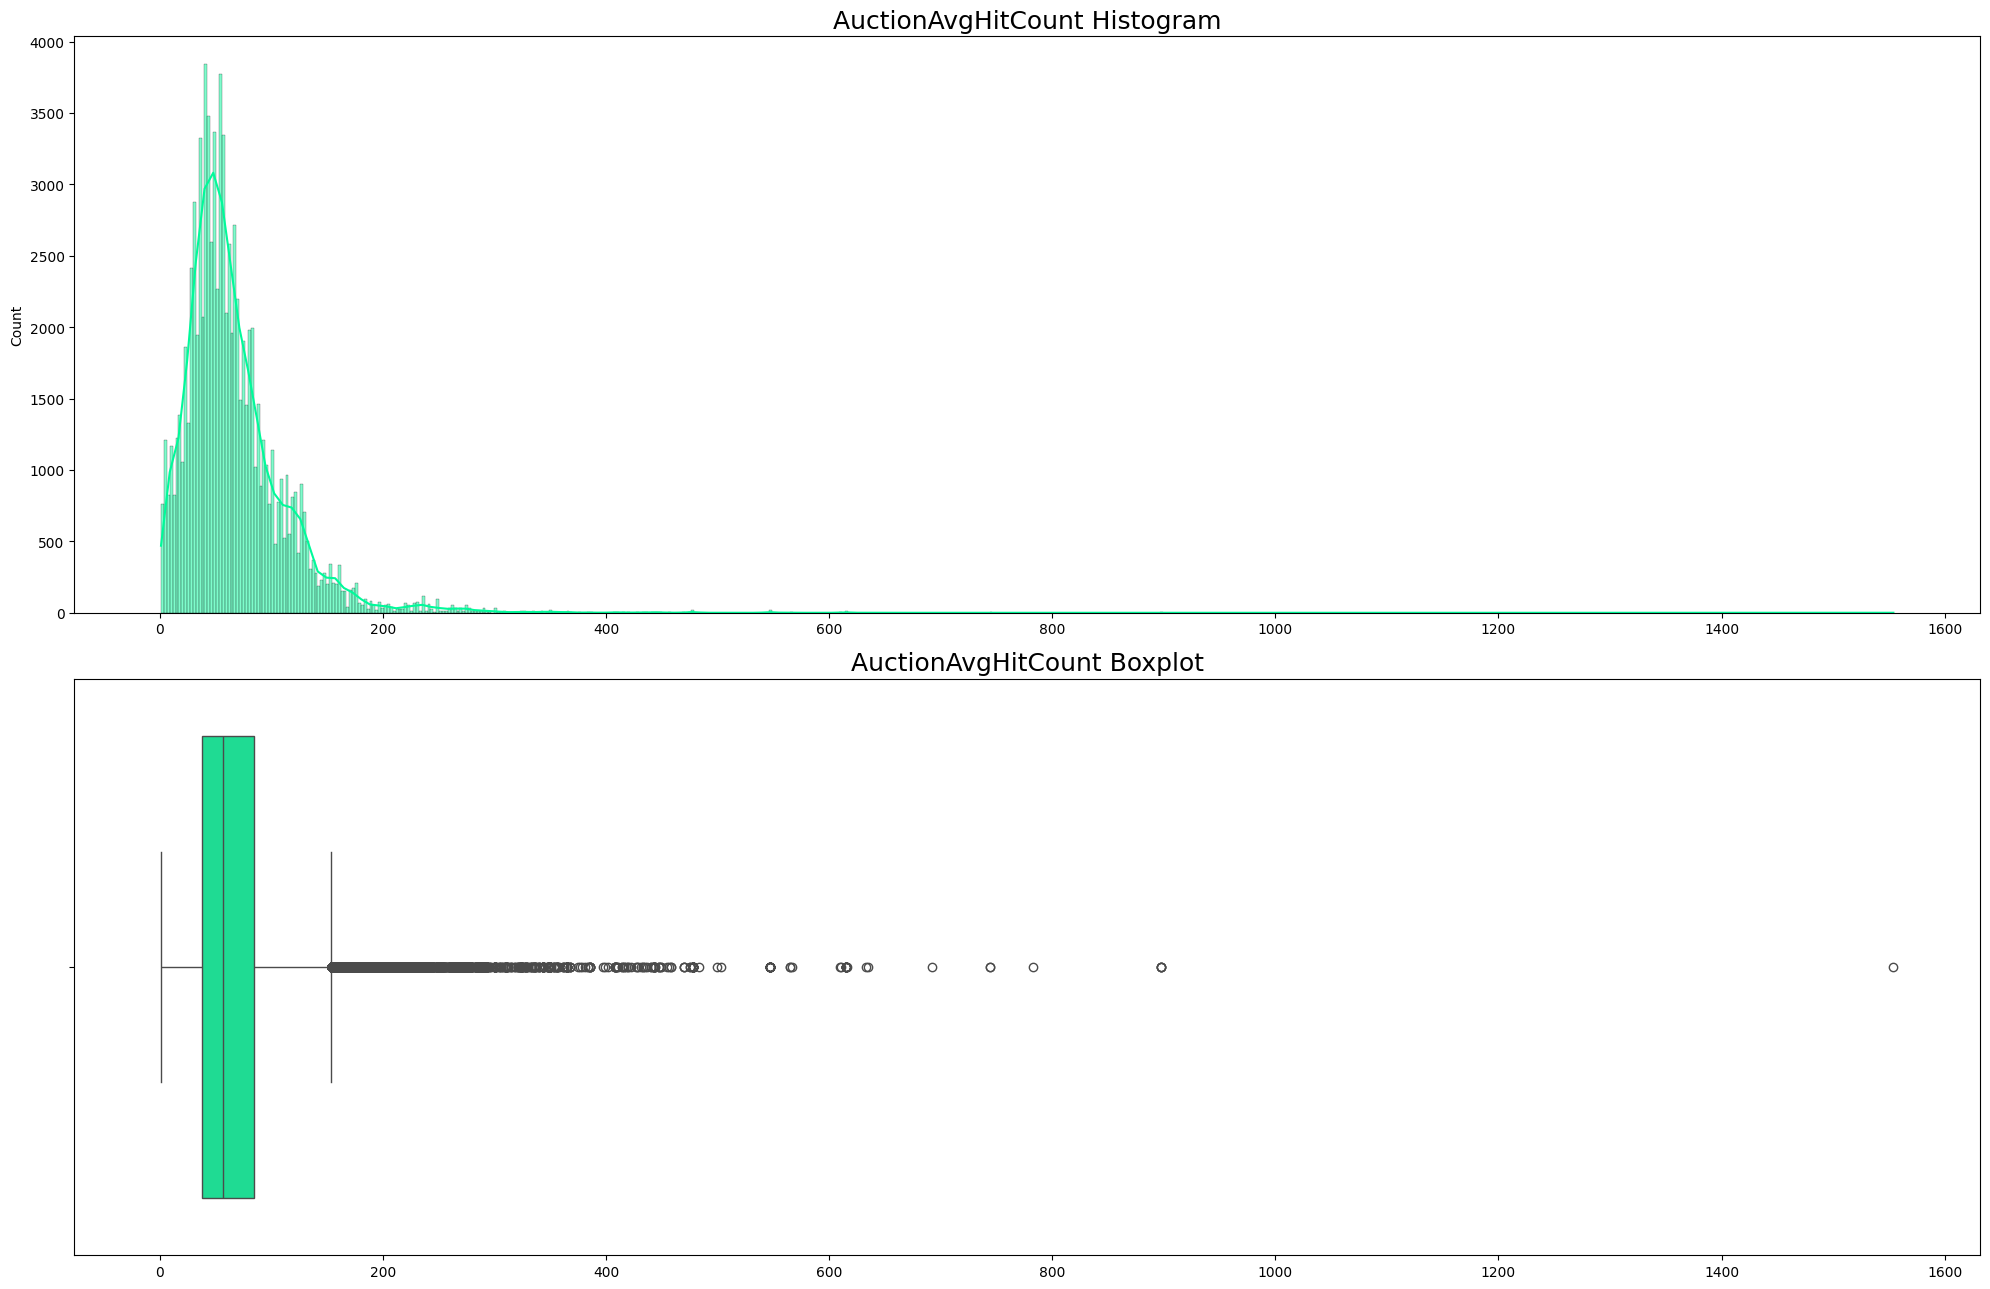

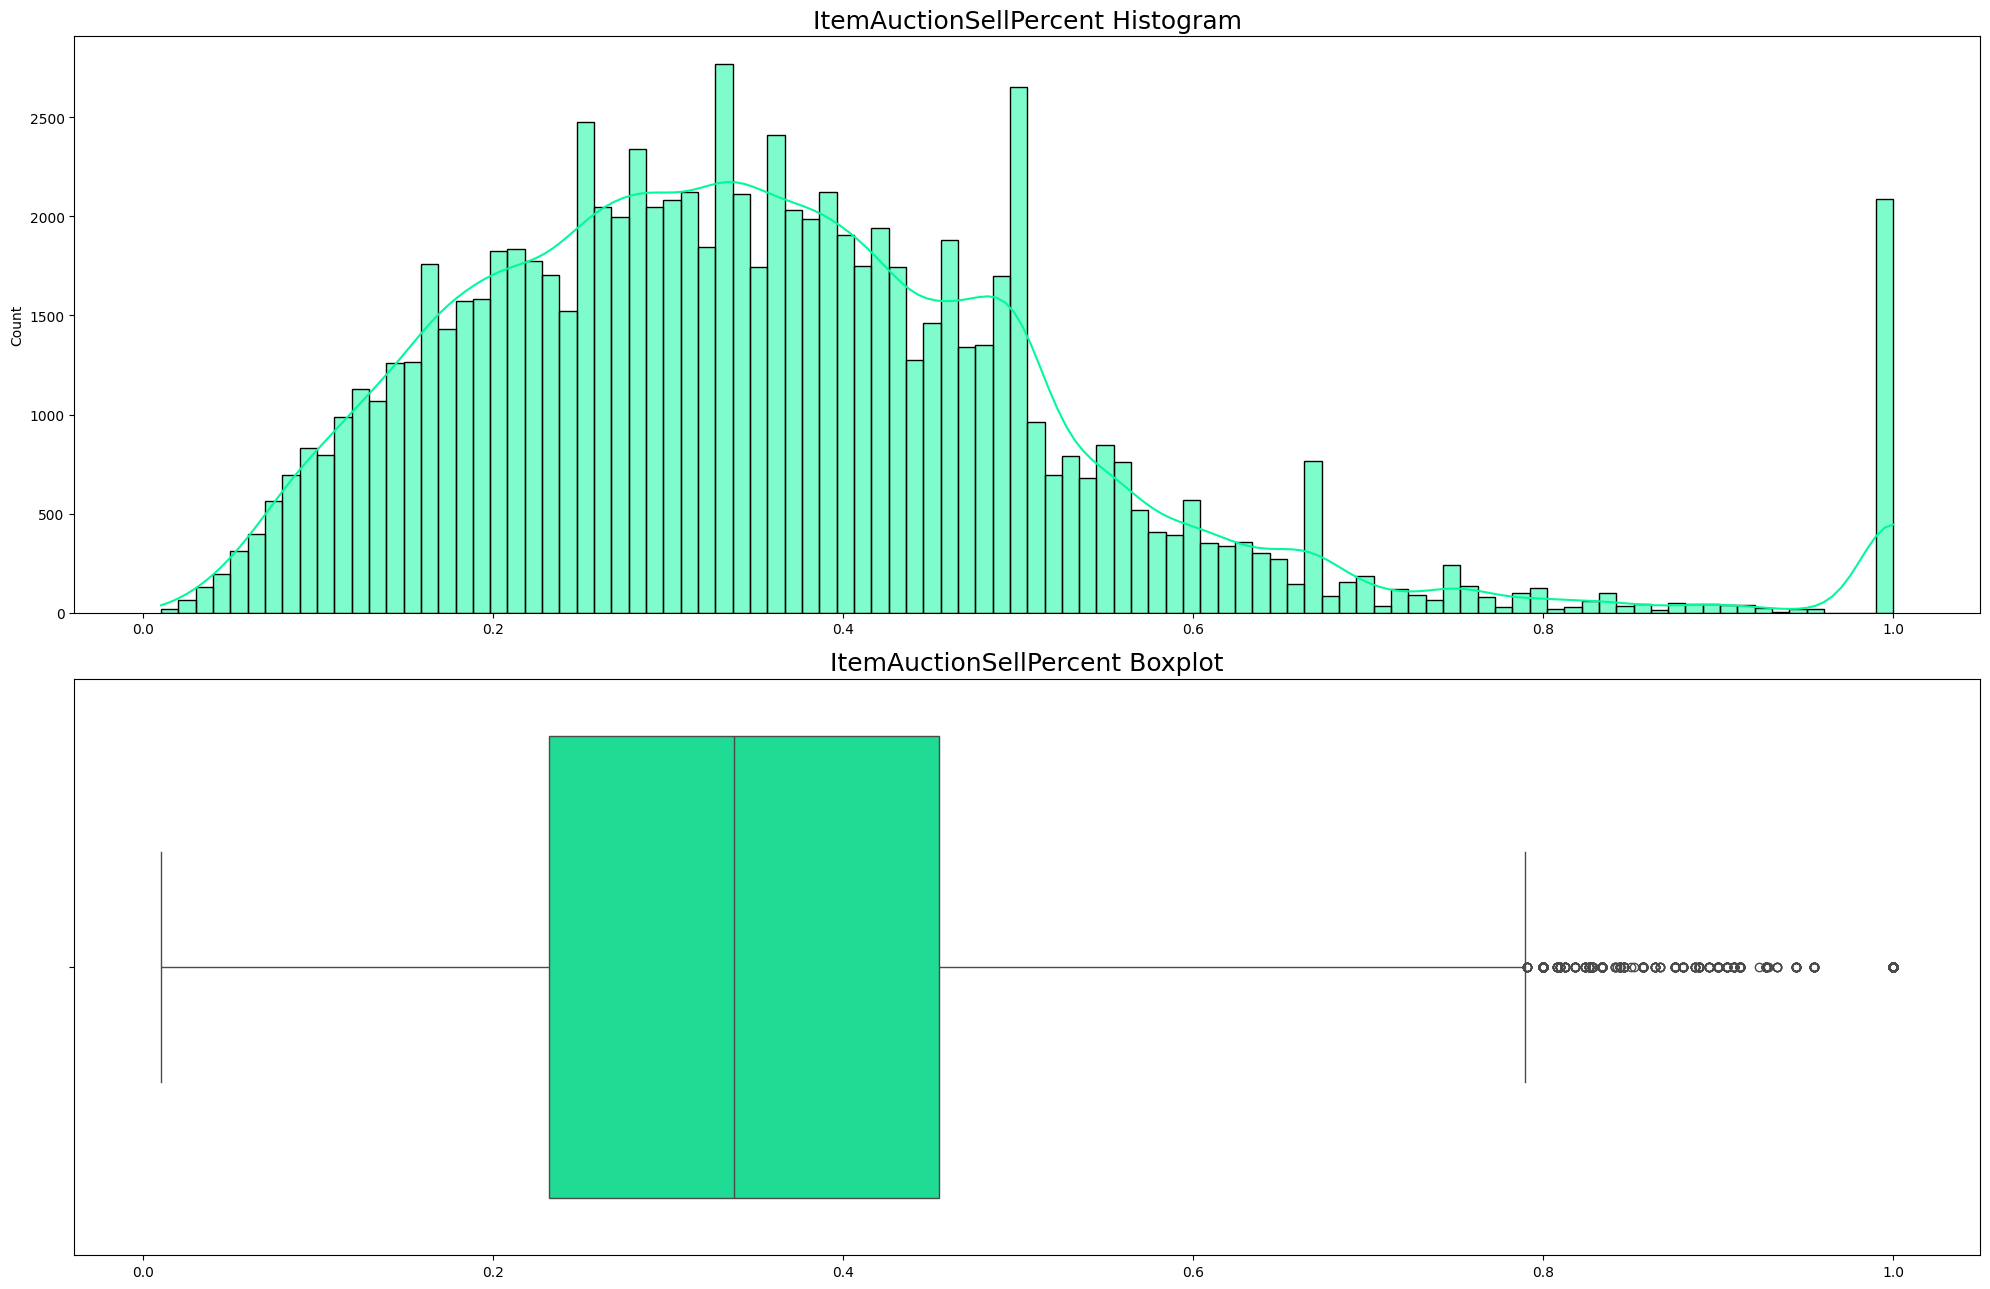

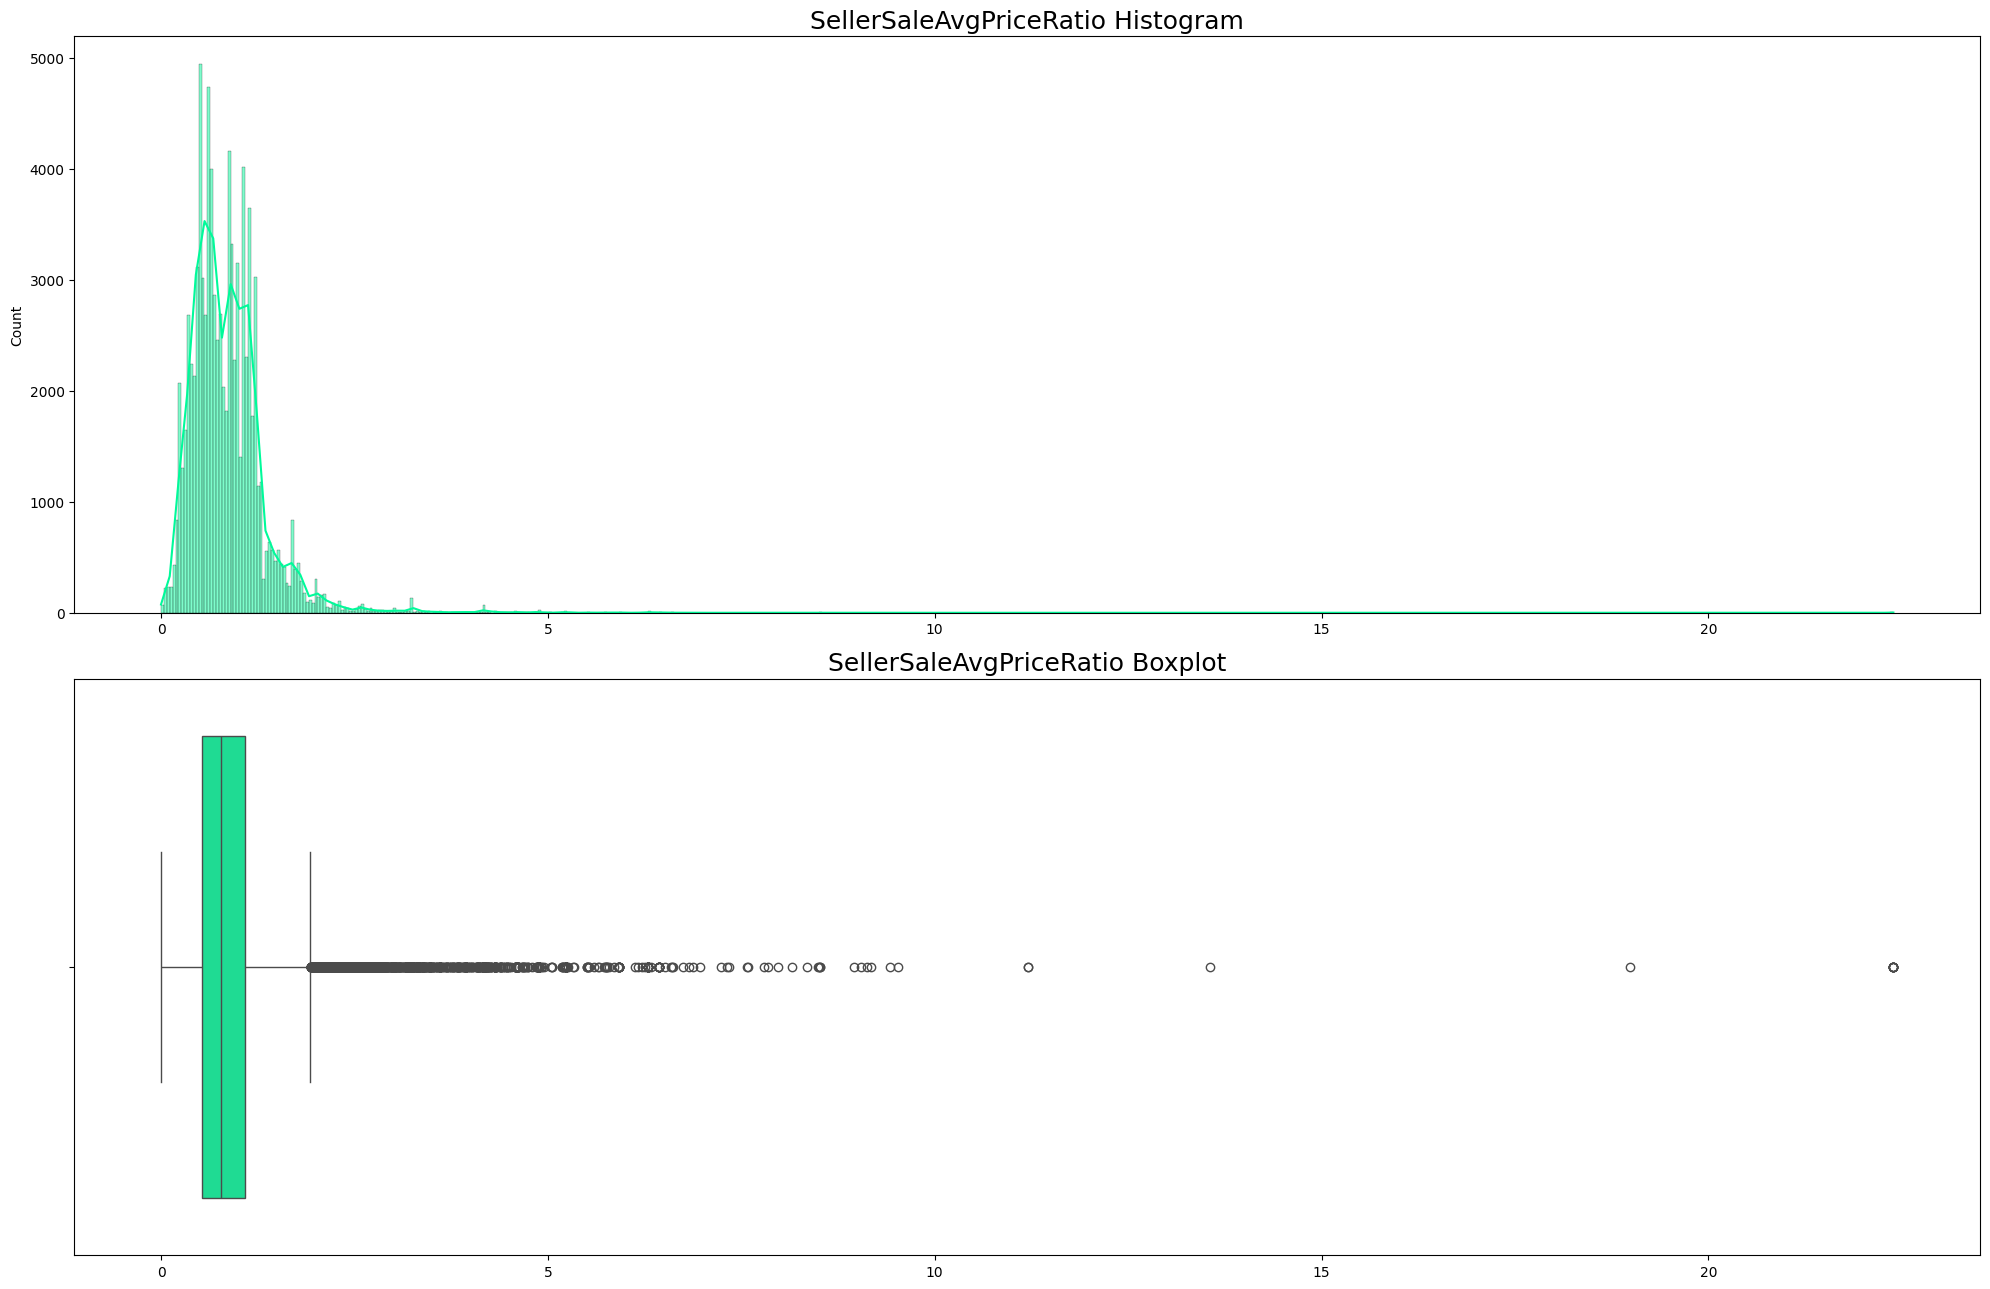

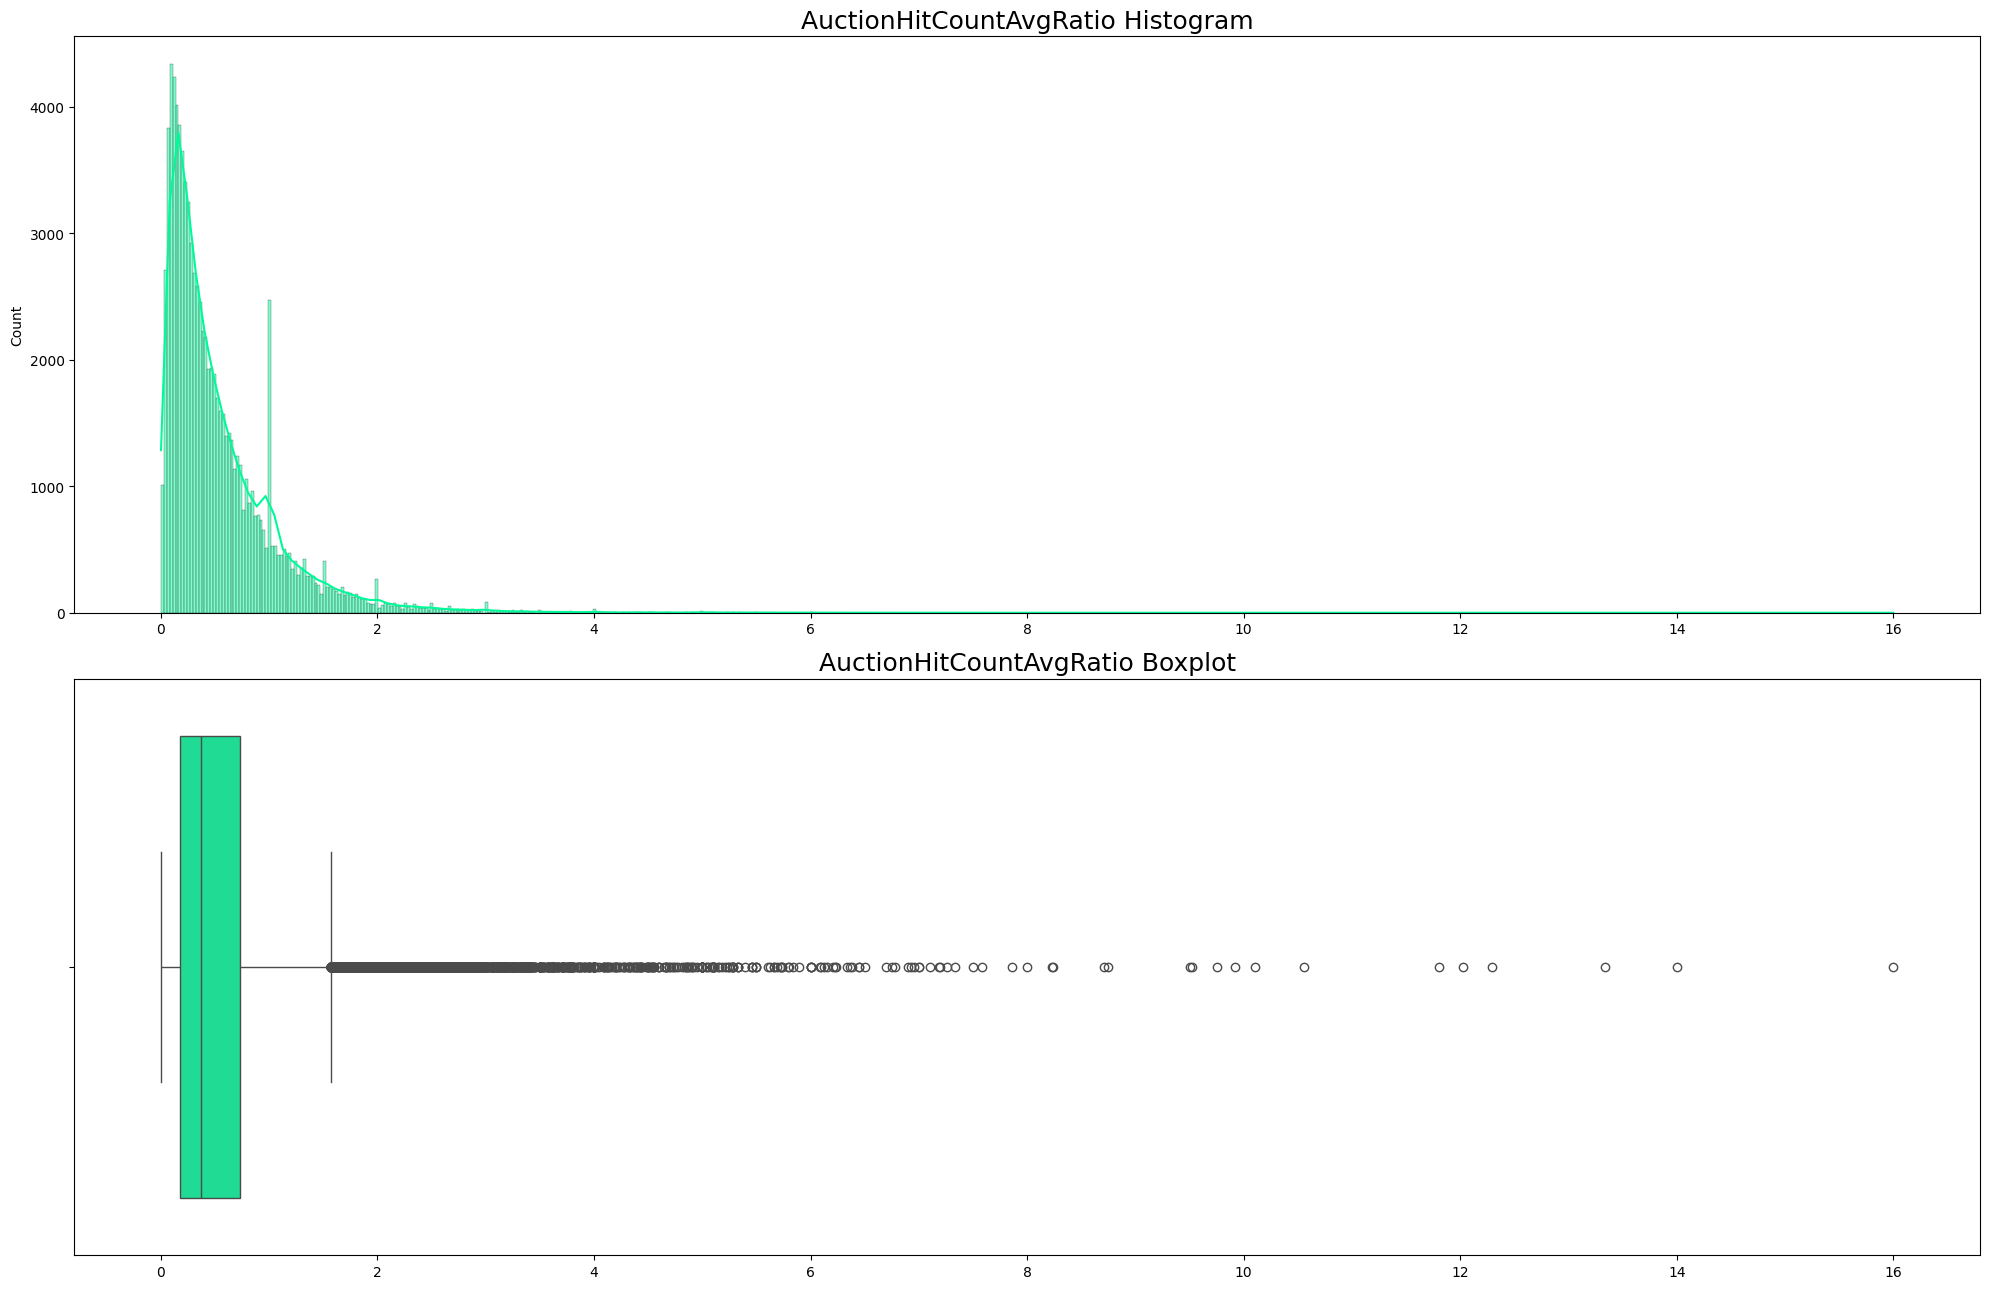

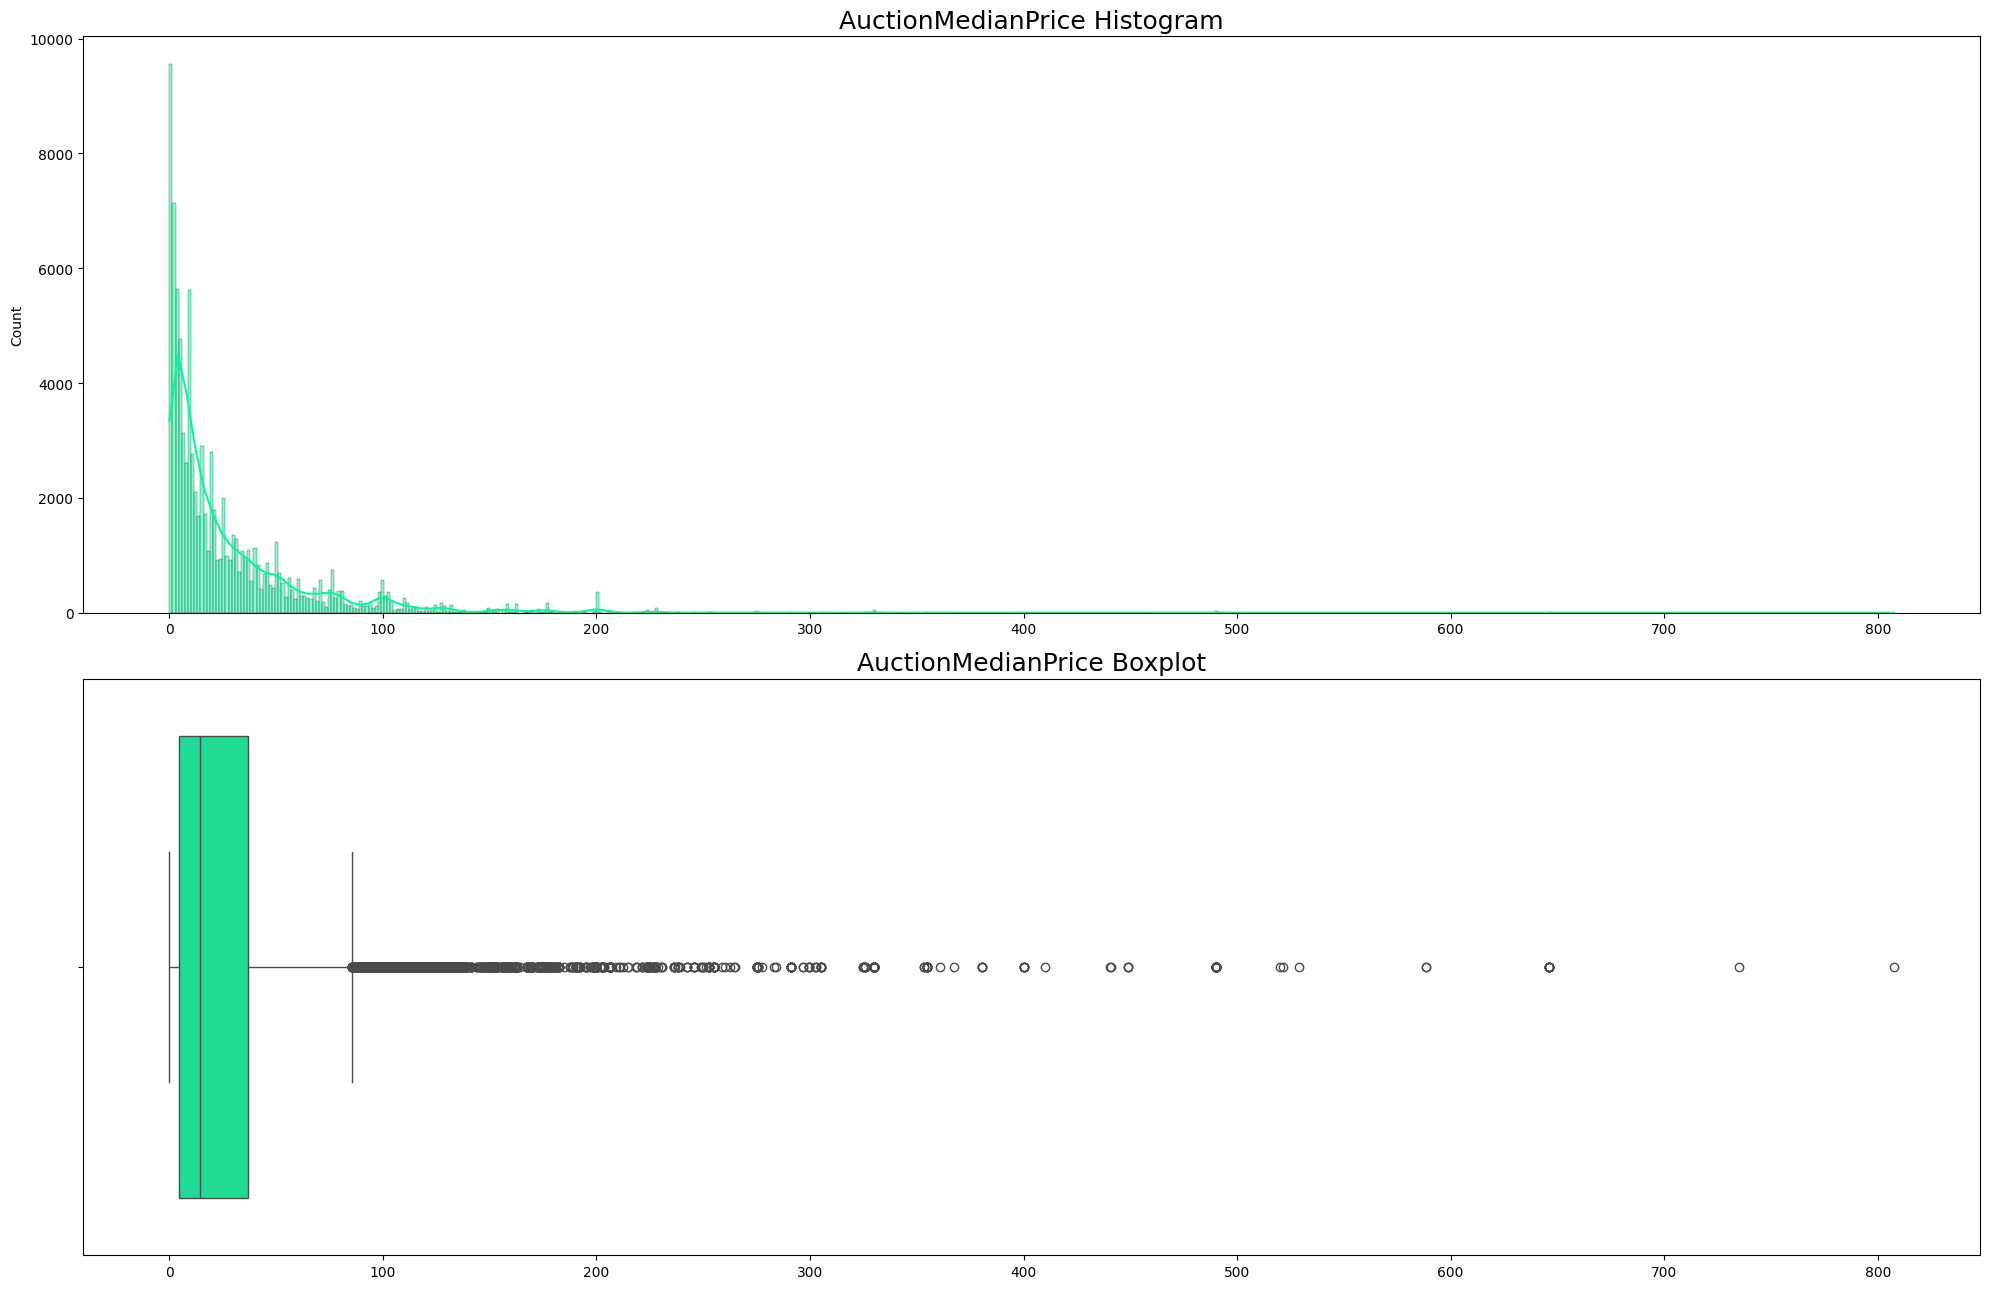

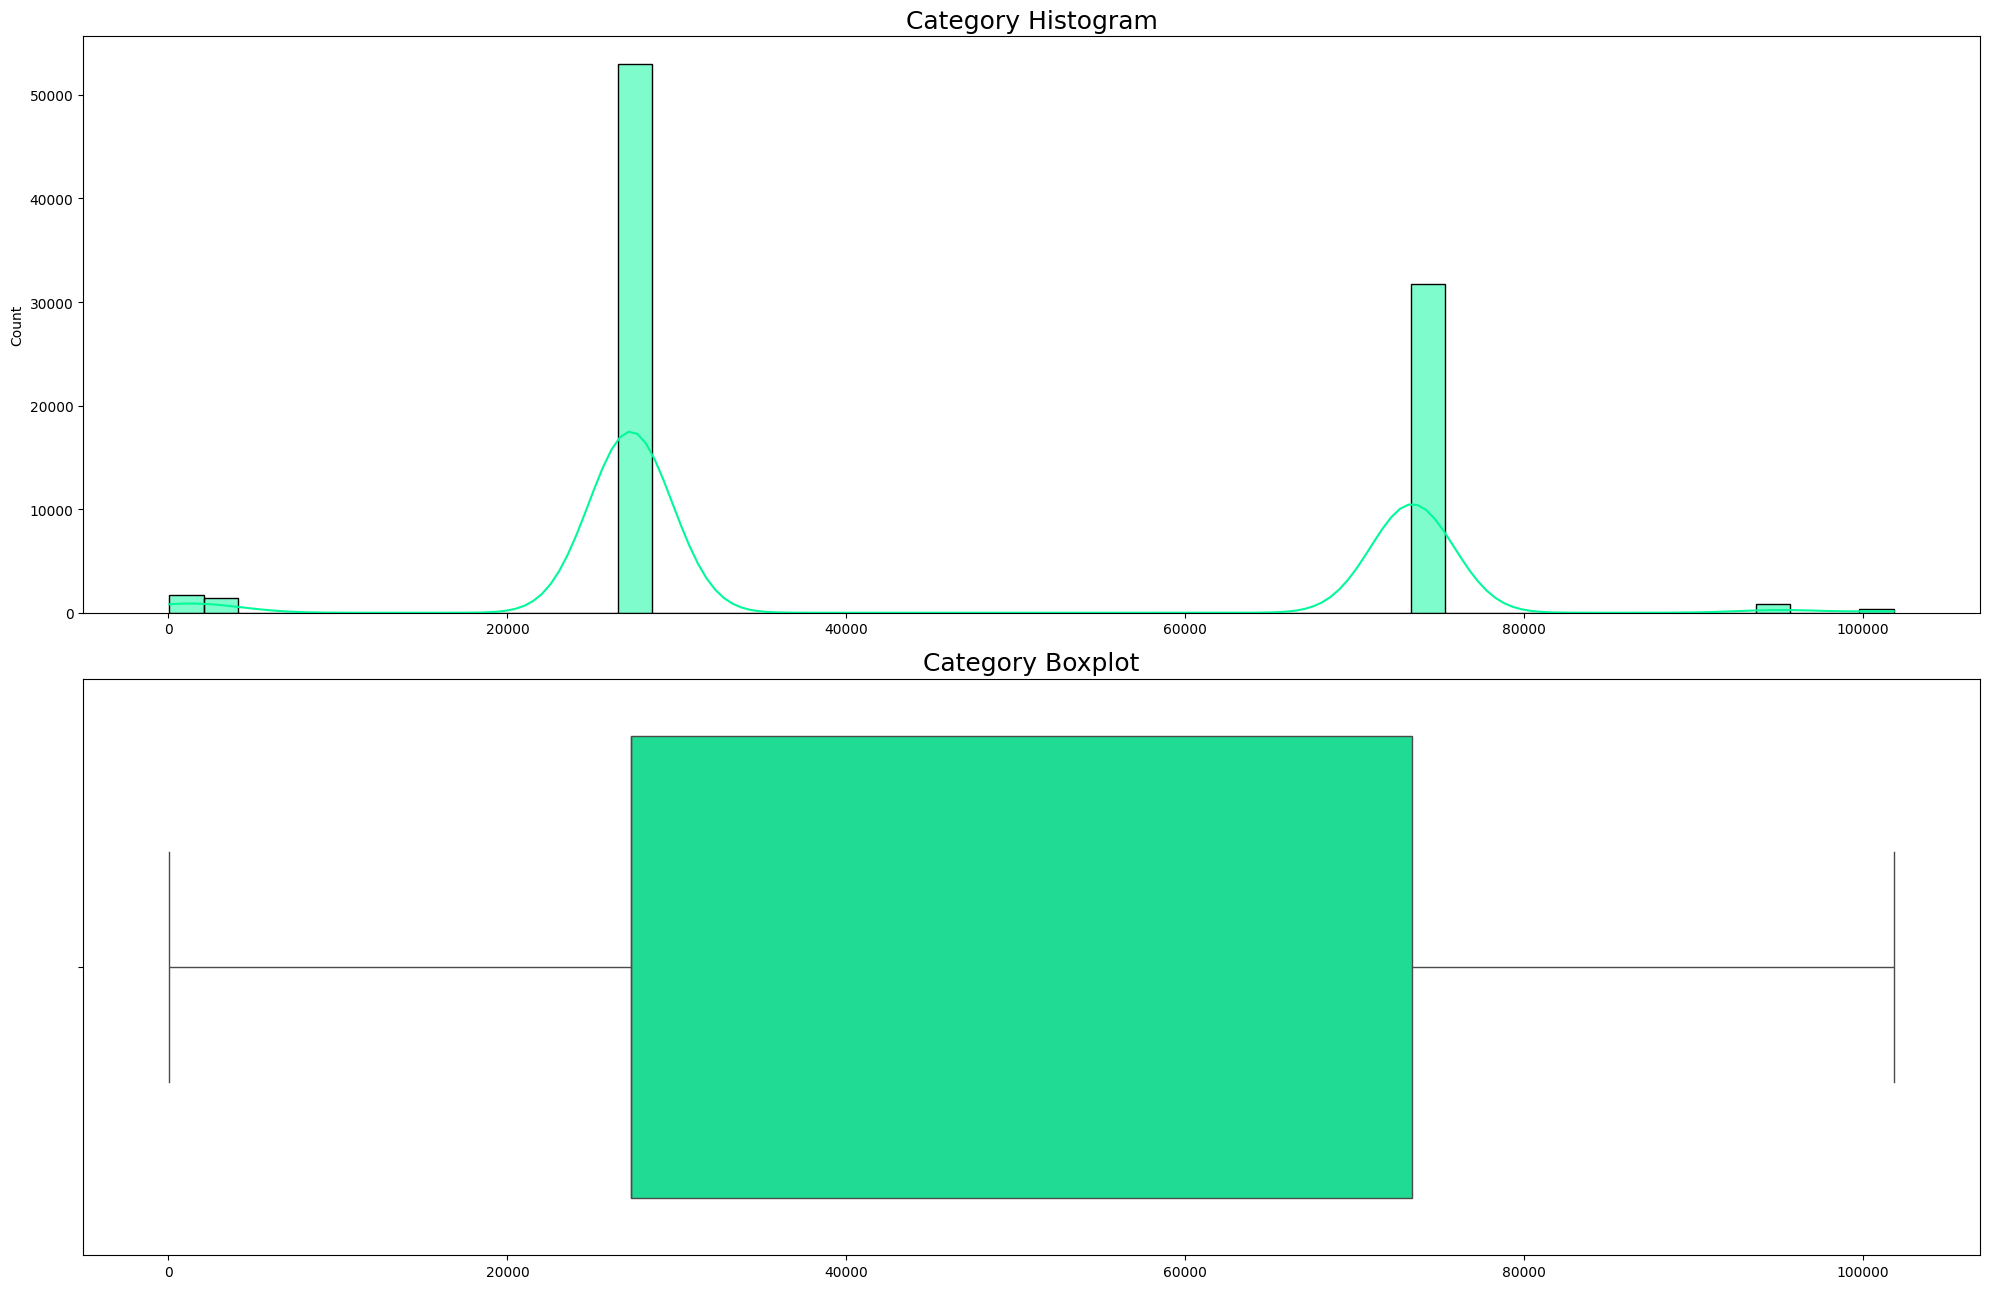

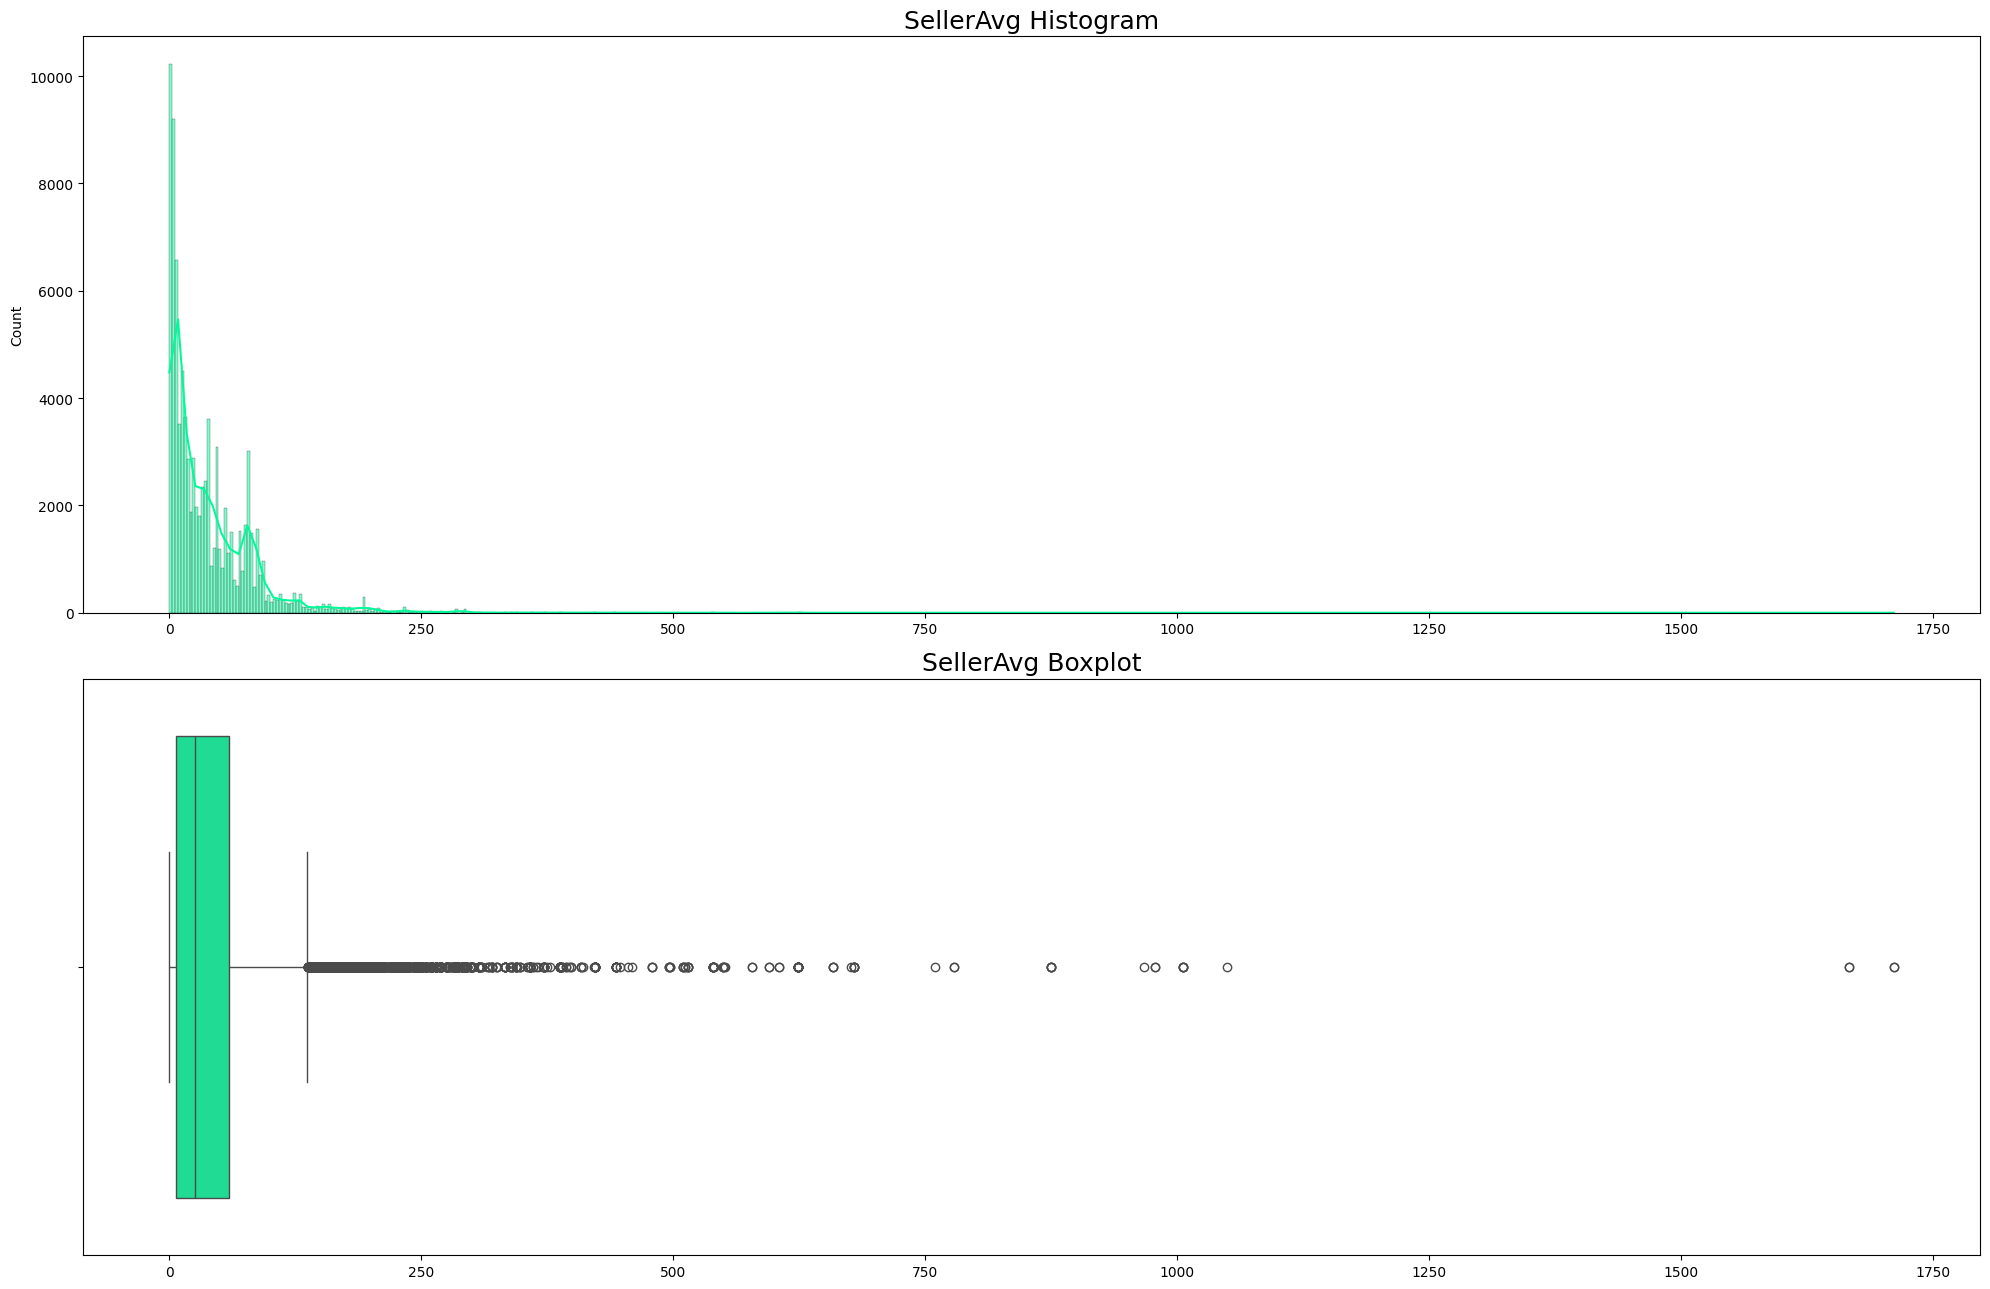

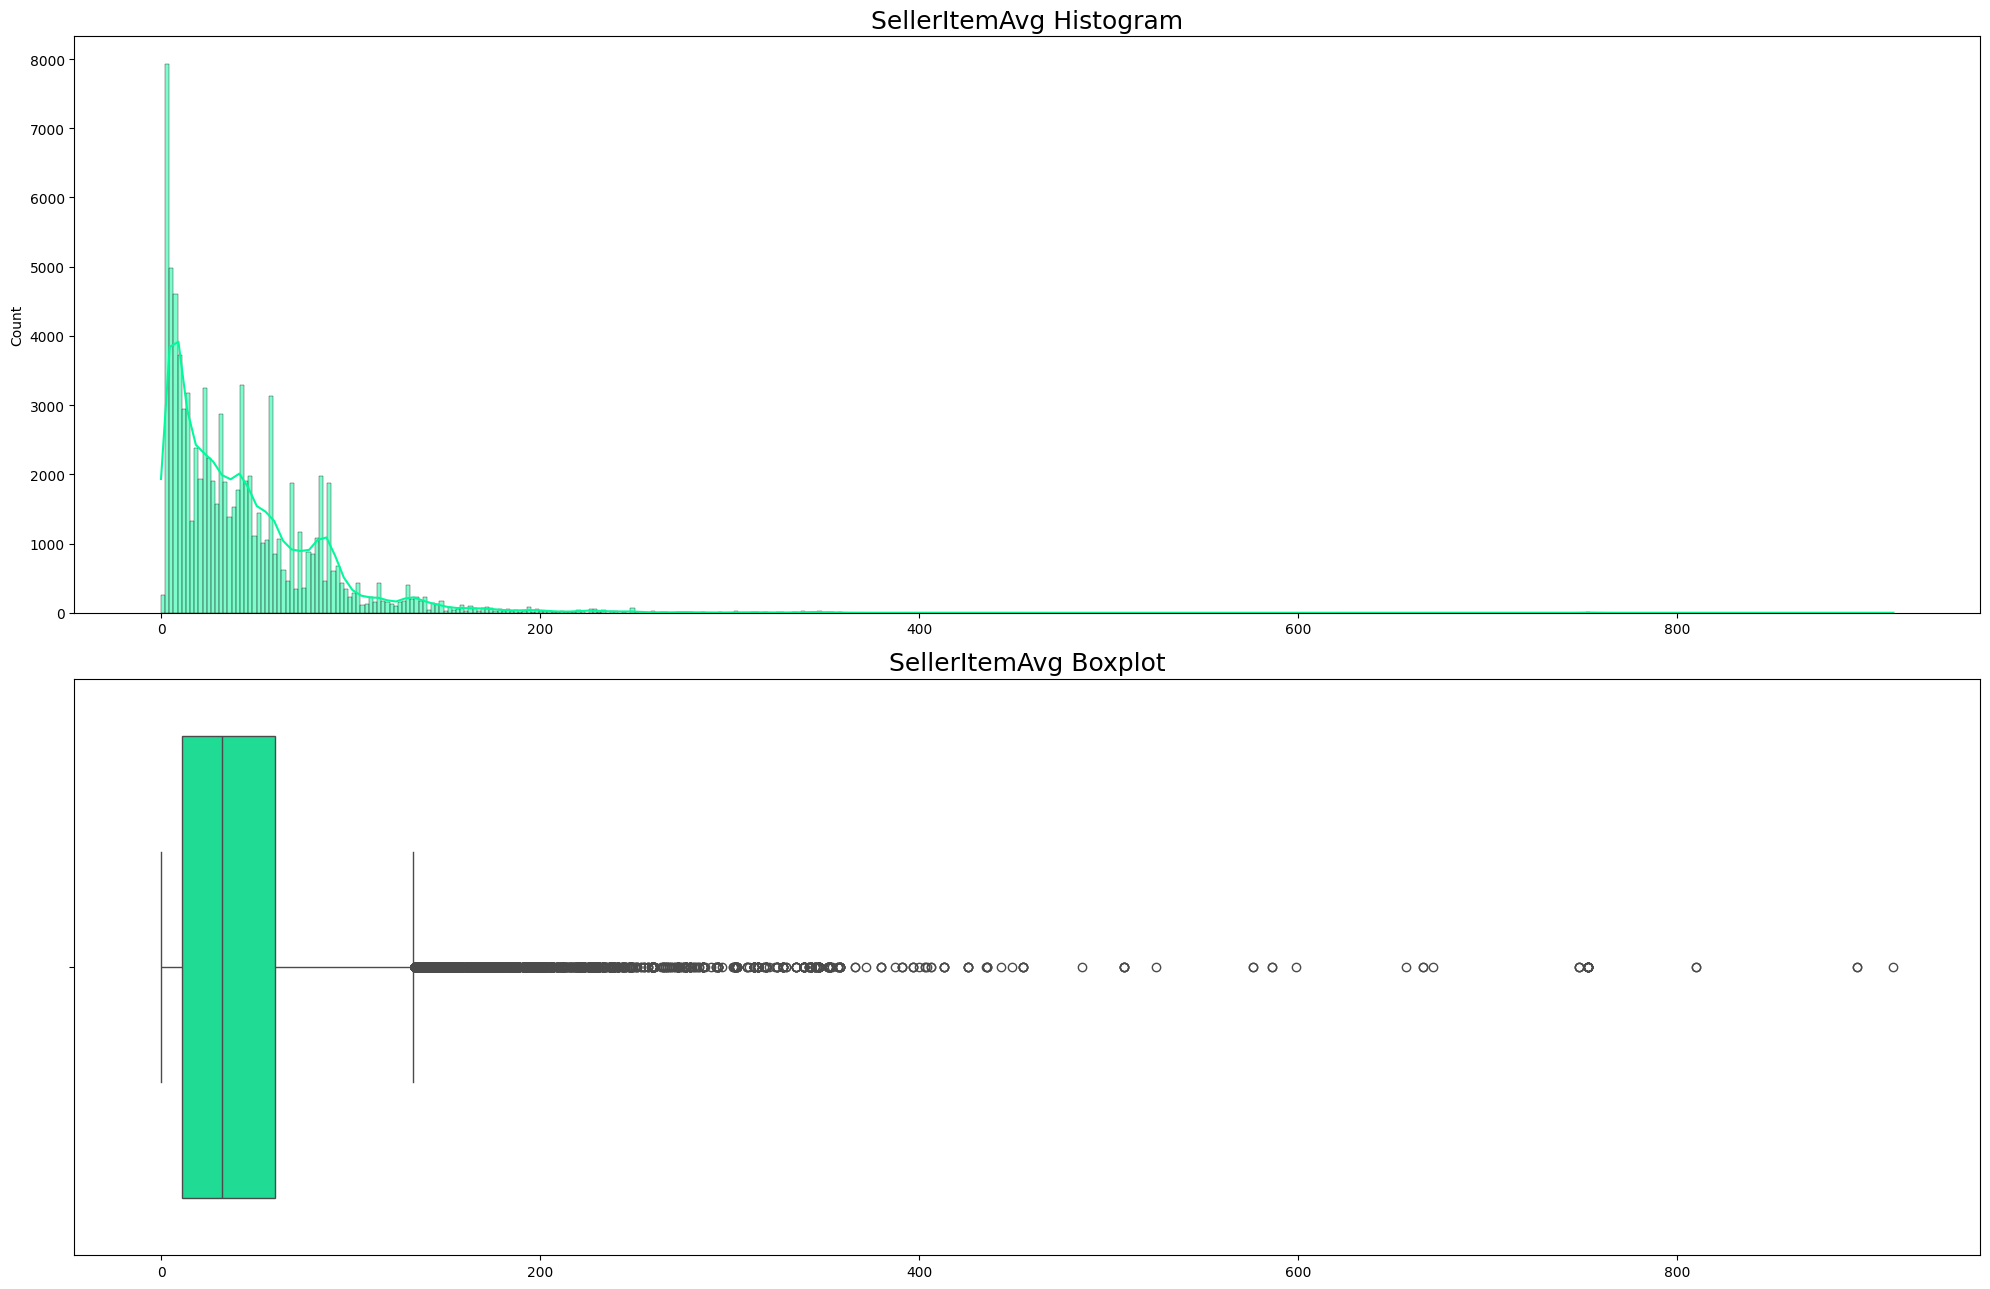

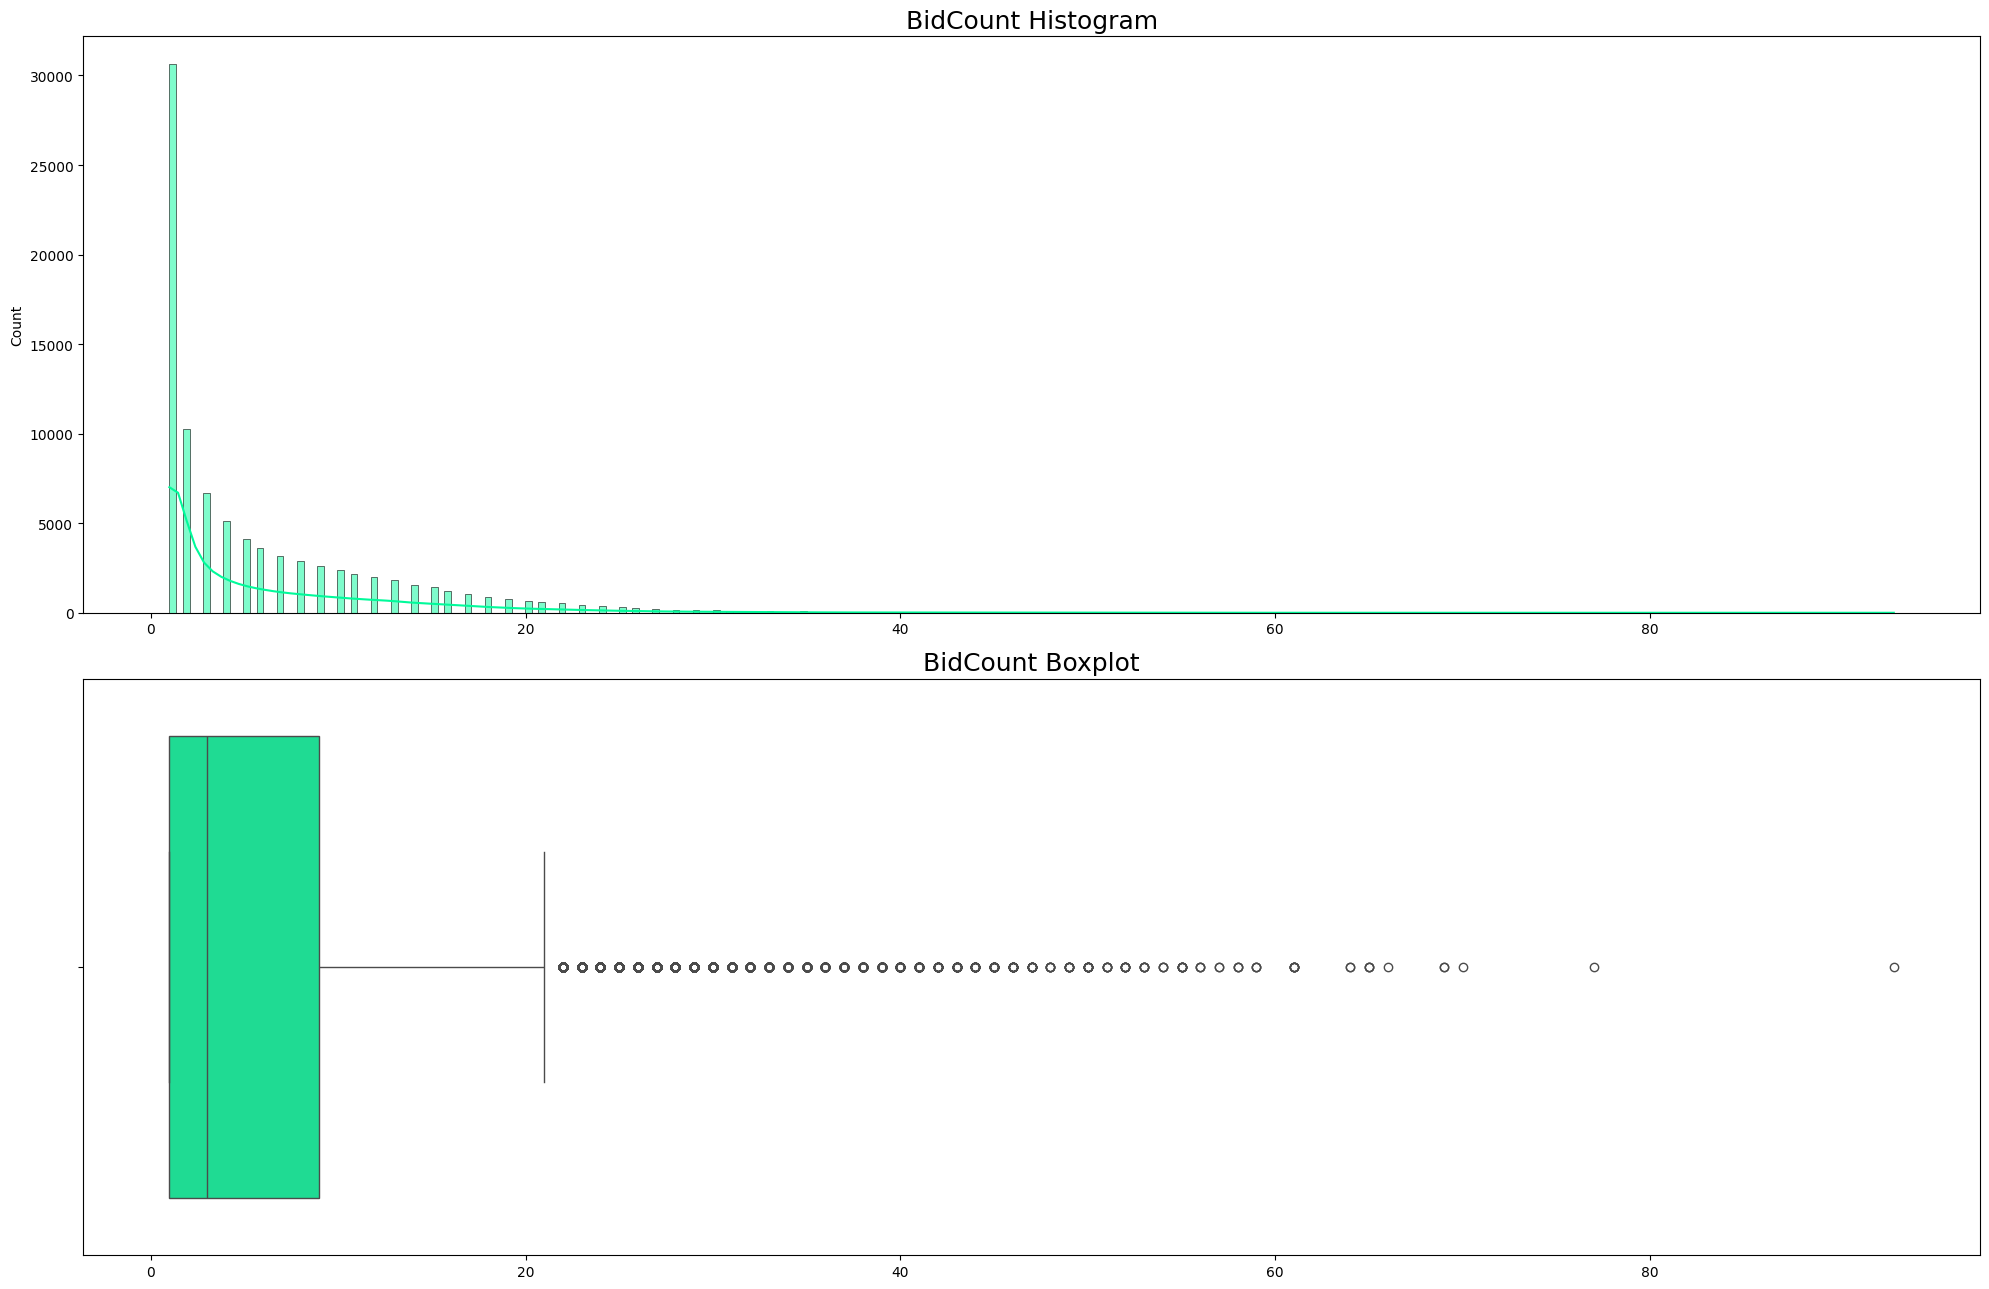

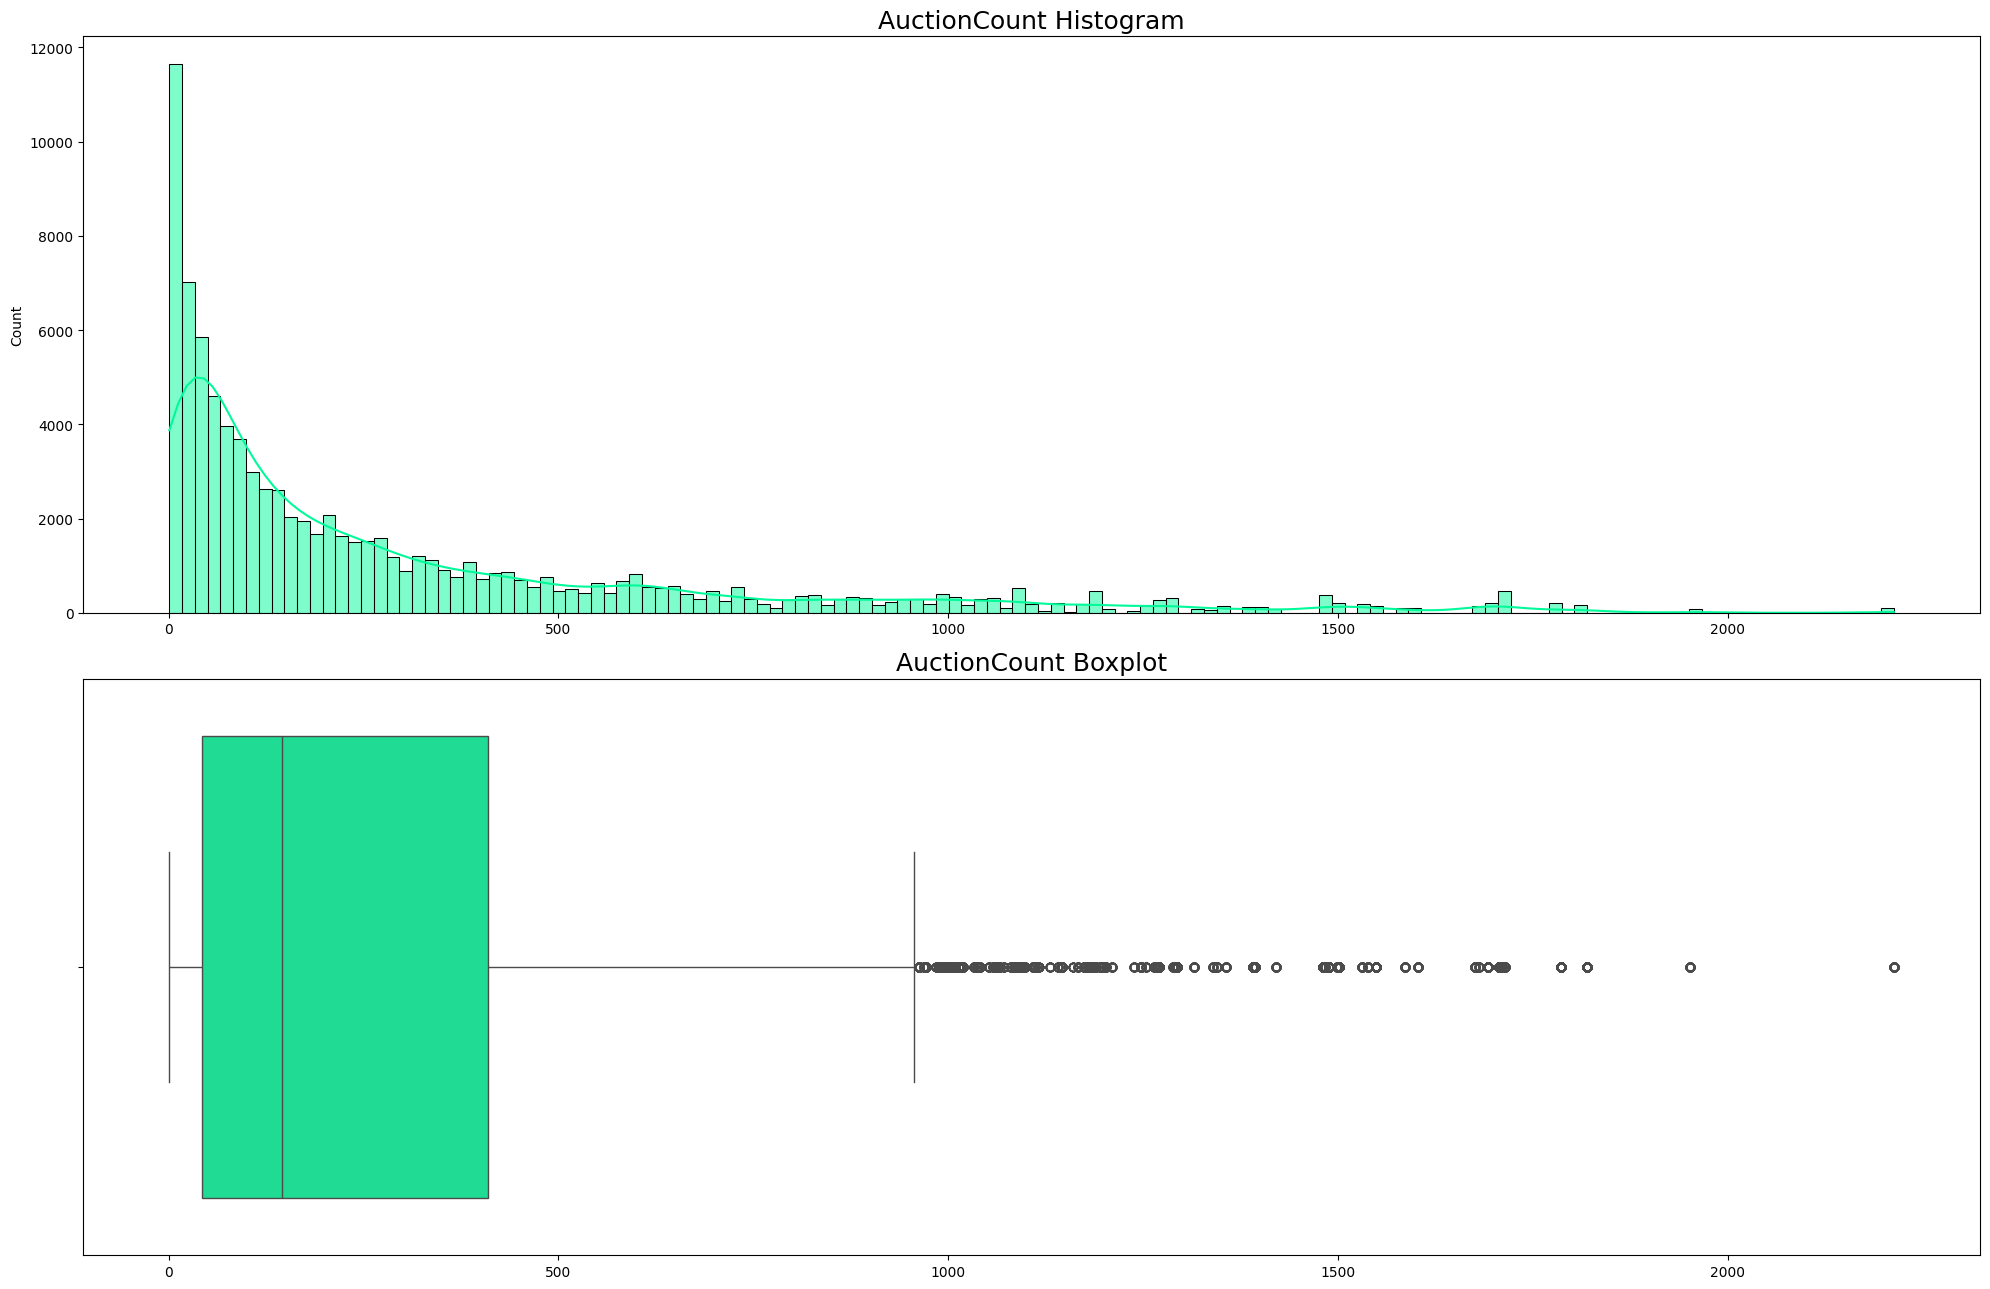

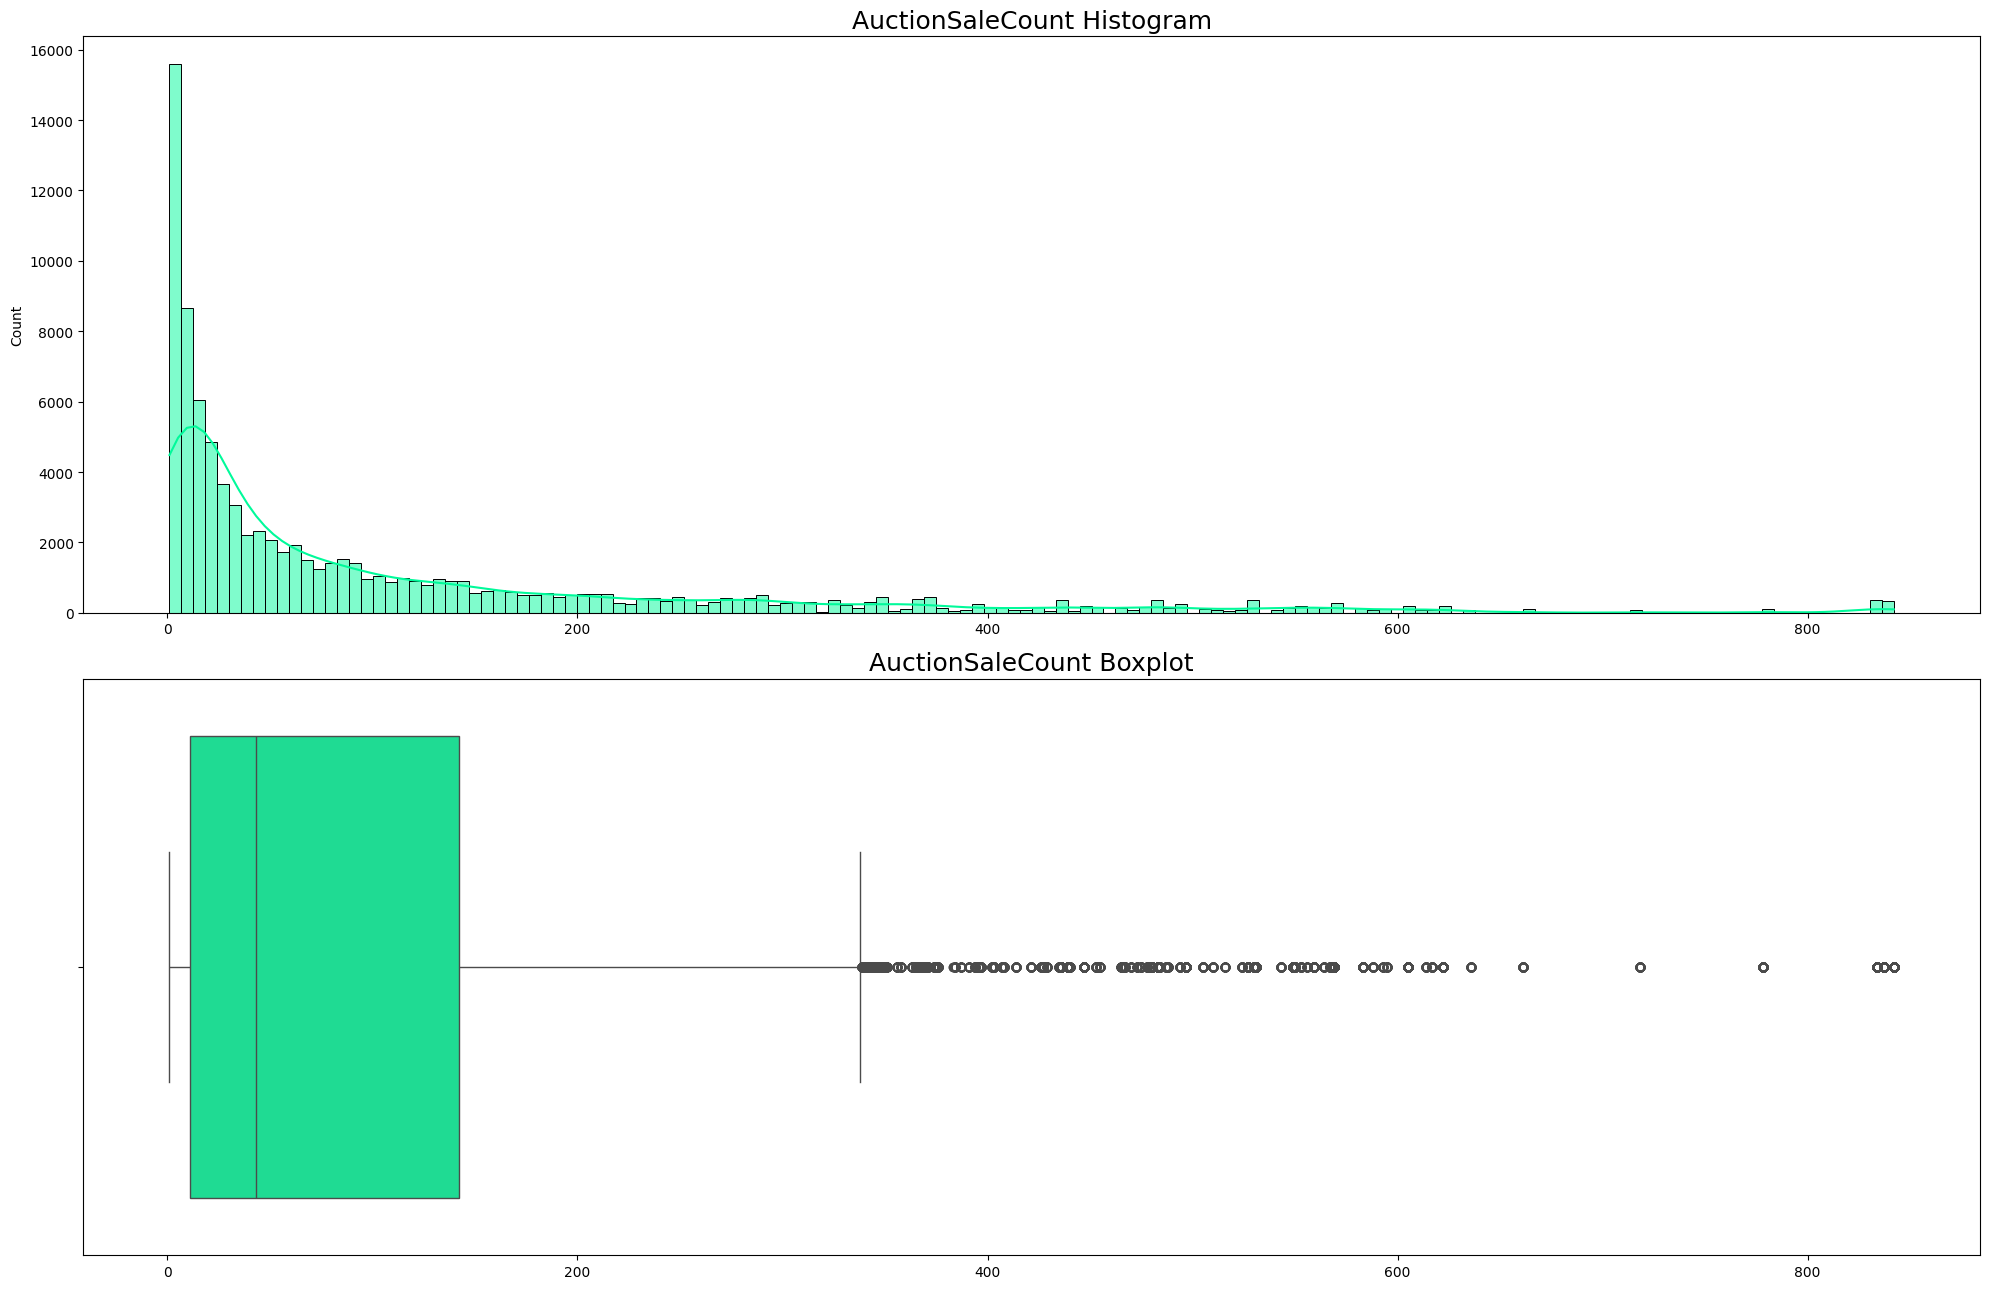

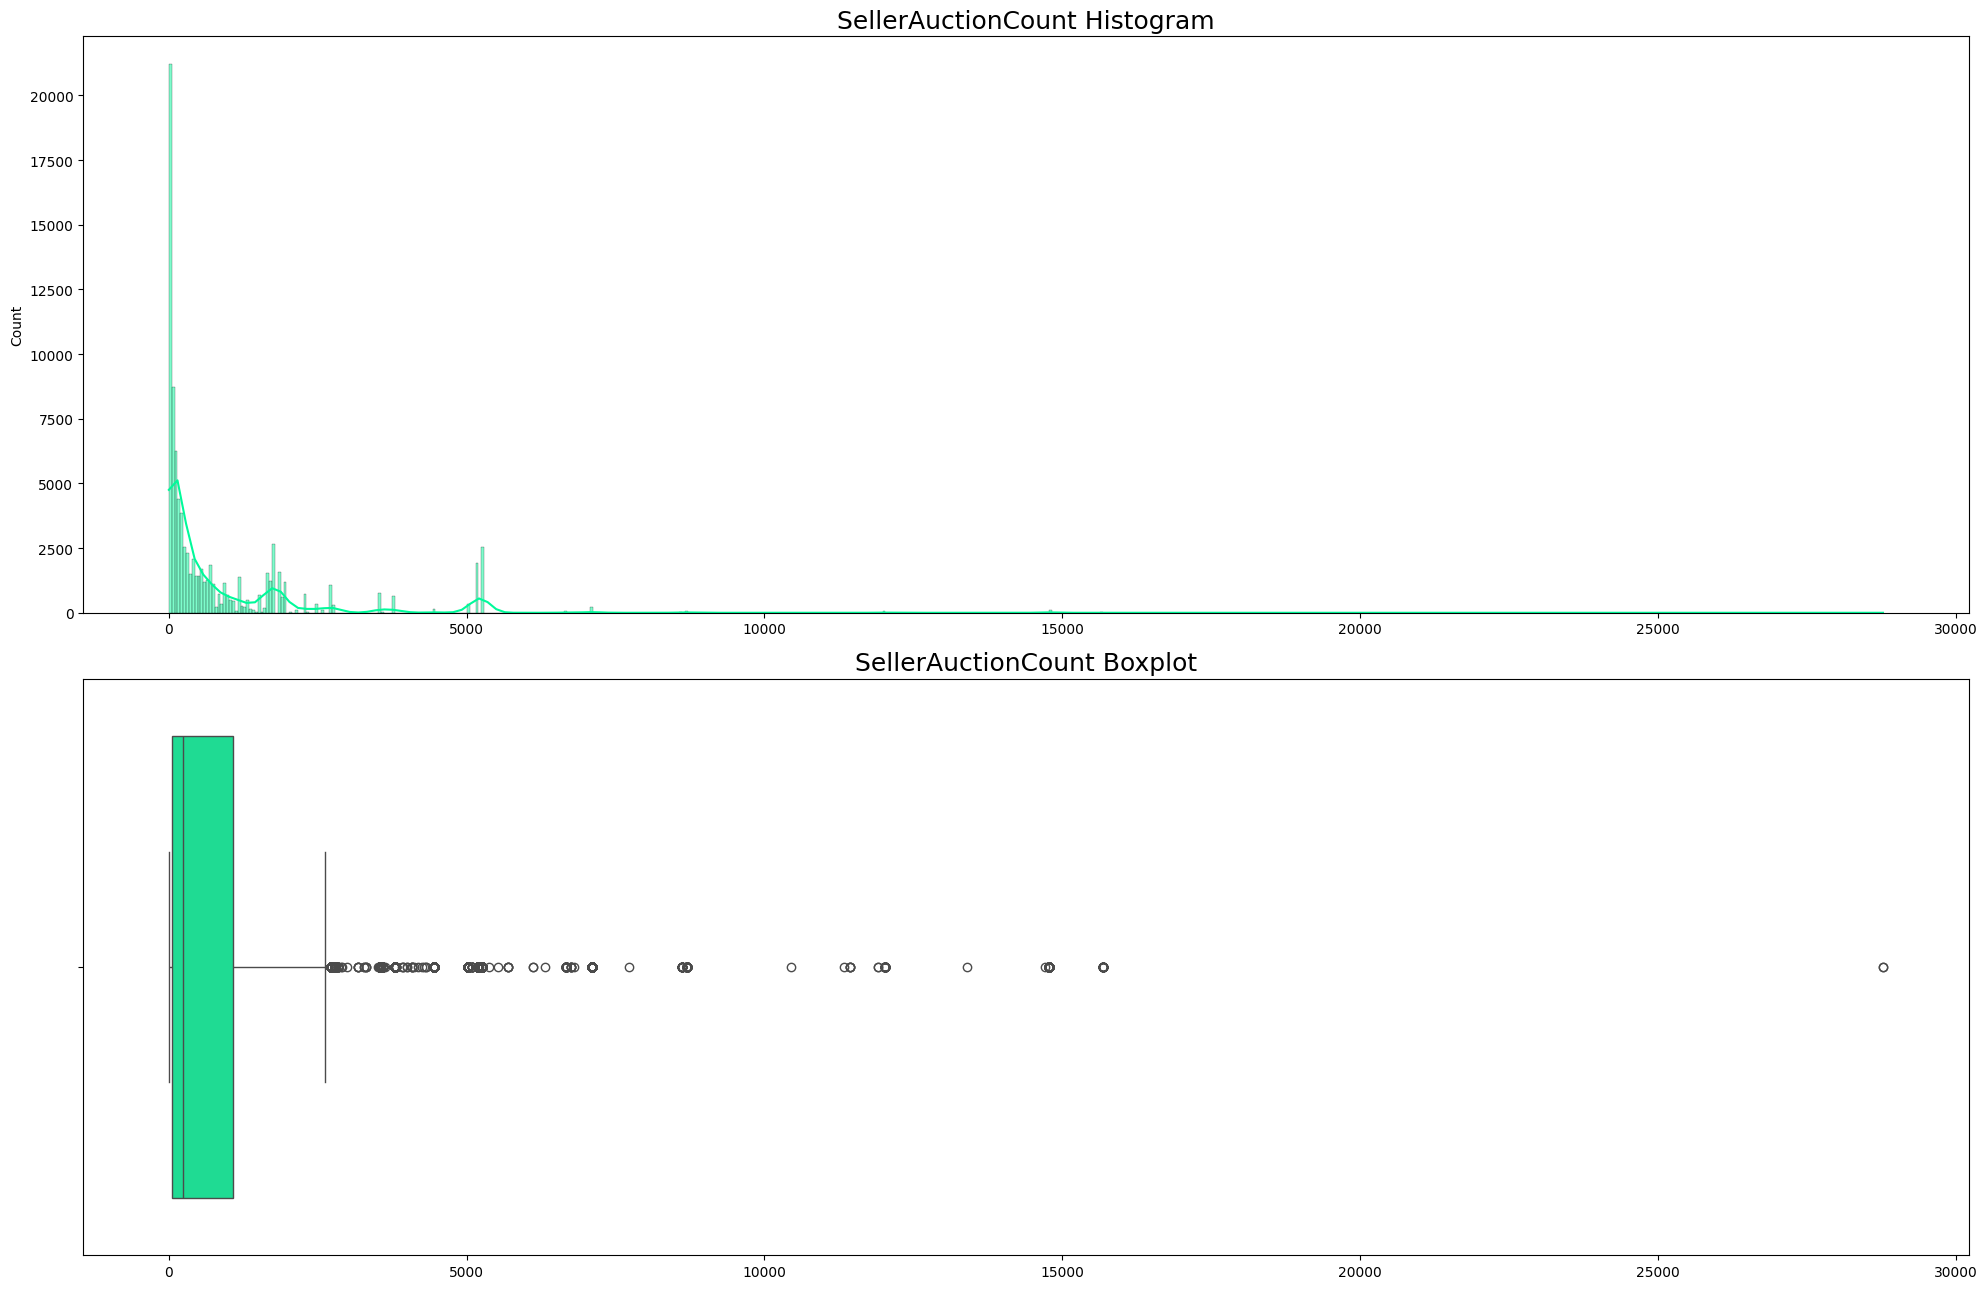

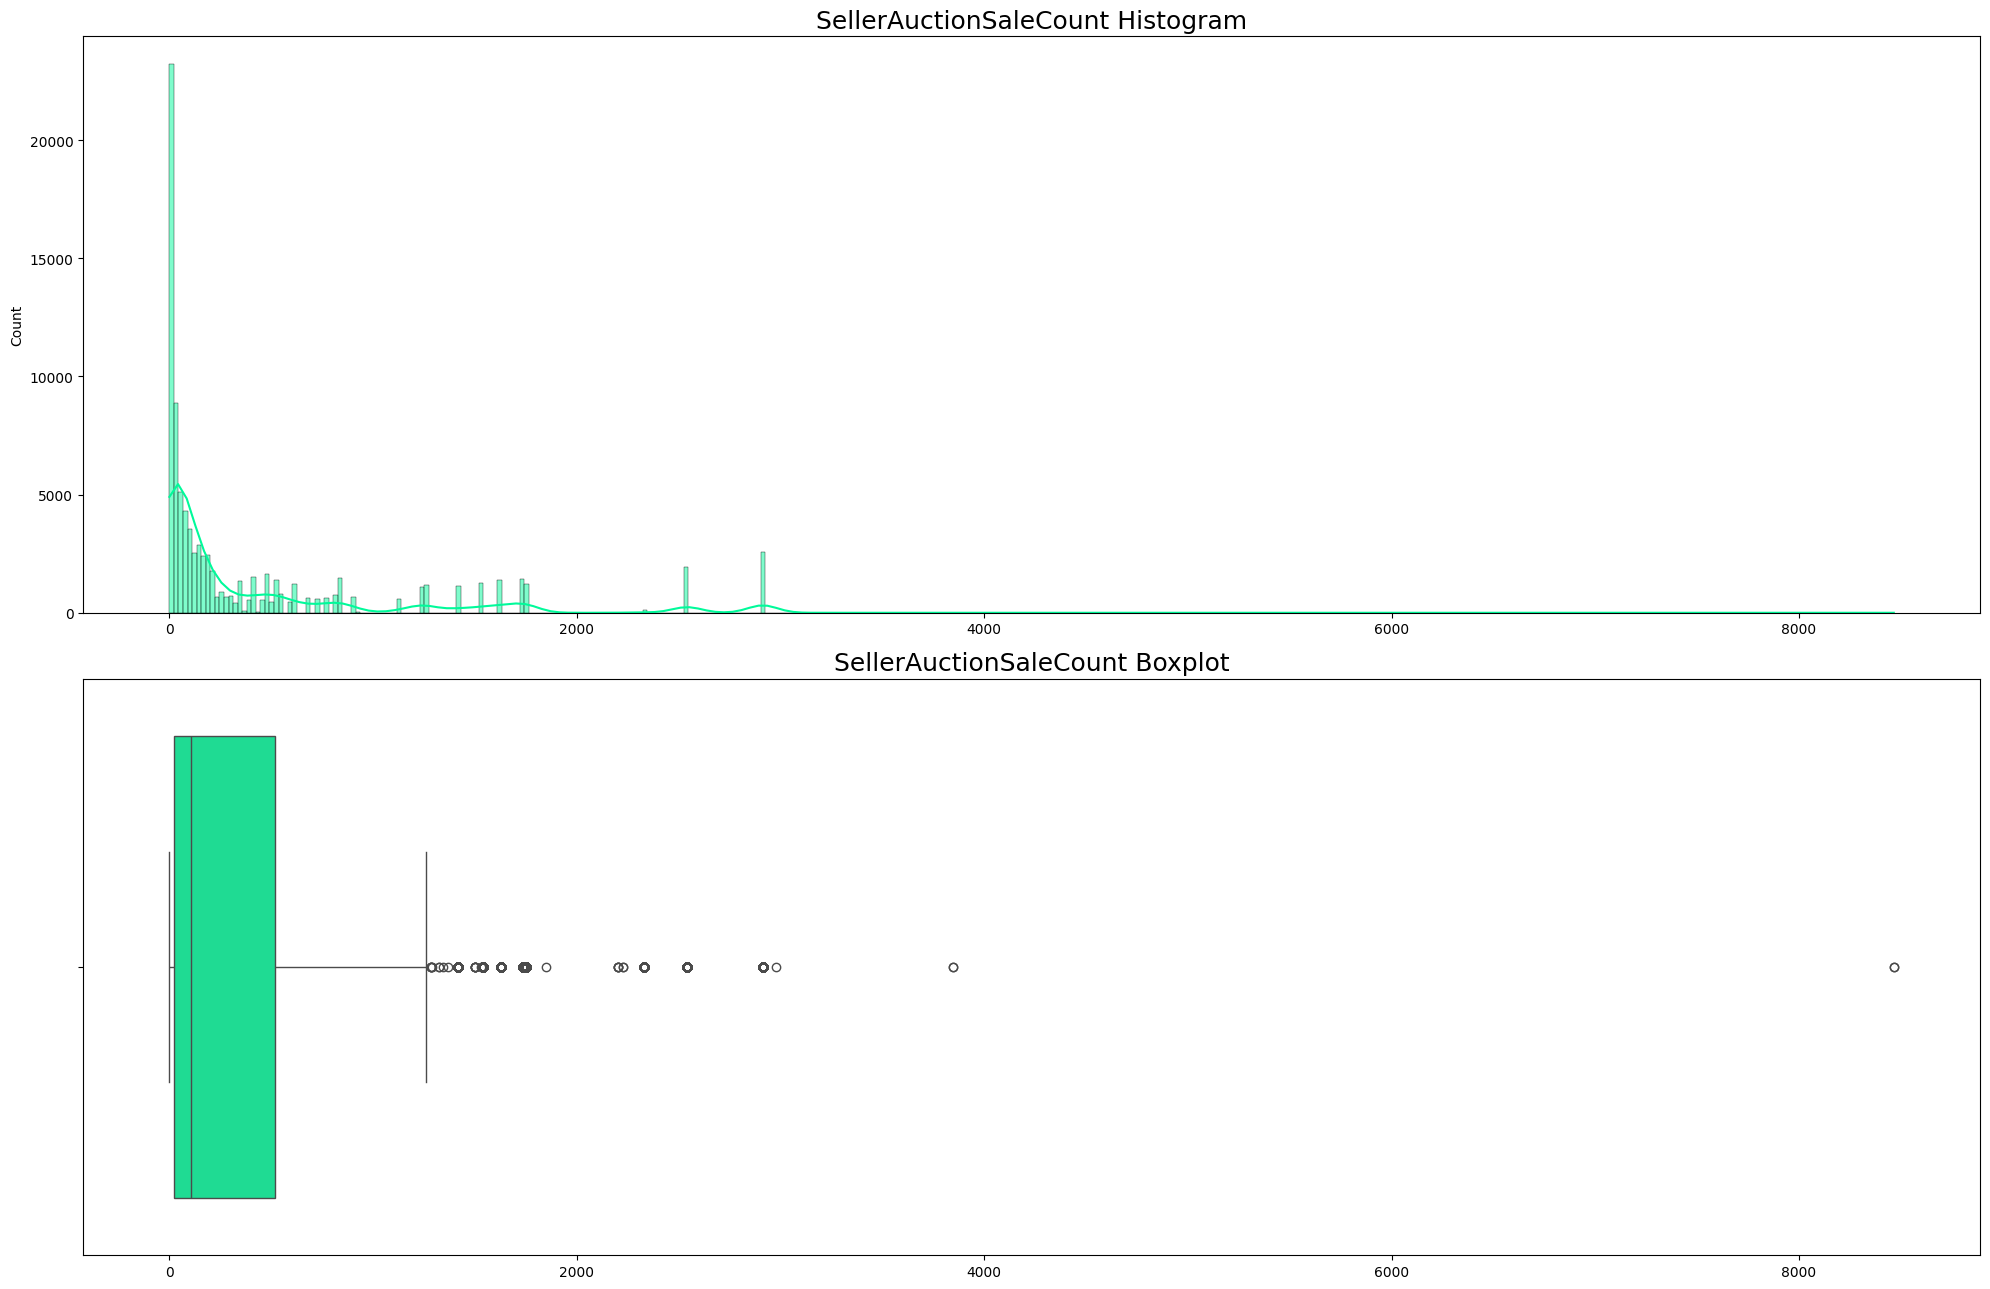

In [ ]:
# loop over continuous numerical data 
for col in continuous_numerical:
    print('\n')
    plot_hist_box(col)

# Data Preprocessing

Data Cleaning

In [ ]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89124 entries, 0 to 89123
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EbayID                    89124 non-null  int64  
 1   Price                     89124 non-null  float64
 2   PricePercent              89124 non-null  float64
 3   StartingBidPercent        89124 non-null  float64
 4   SellerName                89124 non-null  object 
 5   SellerClosePercent        89124 non-null  float64
 6   Category                  89124 non-null  int64  
 7   PersonID                  89124 non-null  int64  
 8   StartingBid               89124 non-null  float64
 9   AvgPrice                  89124 non-null  float64
 10  EndDay                    89124 non-null  object 
 11  QuantitySold              89124 non-null  int64  
 12  HitCount                  89124 non-null  int64  
 13  AuctionAvgHitCount        89124 non-null  int64  
 14  Authen

In [ ]:
df_sub.isnull().sum()

EbayID                      0
Price                       0
PricePercent                0
StartingBidPercent          0
SellerName                  0
SellerClosePercent          0
Category                    0
PersonID                    0
StartingBid                 0
AvgPrice                    0
EndDay                      0
QuantitySold                0
HitCount                    0
AuctionAvgHitCount          0
Authenticated               0
ItemAuctionSellPercent      0
SellerSaleAvgPriceRatio     0
SellerAvg                   0
SellerItemAvg               0
AuctionHitCountAvgRatio     0
BestOffer                   0
ReturnsAccepted             0
IsHOF                       0
BidCount                    0
AuctionCount                0
AuctionSaleCount            0
SellerAuctionCount          0
SellerAuctionSaleCount      0
PriceBuckets                0
AuctionMedianPrice          0
IsInMedianRatio10Percent    0
IsInMedianRatio20Percent    0
IsInMedianRatio25Percent    0
dtype: int

There are no missing values in the columns.

In [ ]:
df_sub.duplicated().sum()

np.int64(0)

There are no duplicated records.

In [ ]:
df_sub.head()

In [ ]:
df_sub.columns

Index(['Price', 'PricePercent', 'StartingBidPercent', 'SellerClosePercent',
       'Category', 'StartingBid', 'AvgPrice', 'EndDay', 'QuantitySold',
       'HitCount', 'AuctionAvgHitCount', 'Authenticated',
       'ItemAuctionSellPercent', 'SellerSaleAvgPriceRatio', 'SellerAvg',
       'SellerItemAvg', 'AuctionHitCountAvgRatio', 'BestOffer',
       'ReturnsAccepted', 'IsHOF', 'BidCount', 'AuctionCount',
       'AuctionSaleCount', 'SellerAuctionCount', 'SellerAuctionSaleCount',
       'PriceBuckets', 'AuctionMedianPrice', 'IsInMedianRatio10Percent',
       'IsInMedianRatio20Percent', 'IsInMedianRatio25Percent'],
      dtype='object')

# Split the data

Split the data into 3 parts.<br>
Training Set, Validation Set, and Validation Set. The validation set it is used for hyperparameter tuning of a model.<br>
So we will keep the 80% as training set.<br>
10% as testing set. <br>
10% as validation set.

In [ ]:
from sklearn.model_selection import train_test_split
# The X value are the independent variables
X = df_sub.iloc[:,1:]

# The target variables for this Task is the 'Price'
y = df_sub.iloc[:,:1]

# Splitting dataset in 80-20 fashion .i.e. 
# Training set is 80% of total data
# Combined set of testing & validation is 
# 20% of total data
X_train, x_Combine, y_train, y_Combine = train_test_split(X,y,
                                              train_size=0.8,
                                              random_state=42)

# Splitting combined dataset in 50-50 fashion .i.e. 
# Testing set is 50% of combined dataset
# Validation set is 50% of combined dataset
X_val, X_test, y_val, y_test = train_test_split(x_Combine,
                                                y_Combine,
                                                test_size=0.5,
                                                random_state=42)


In [ ]:
# Training set 
print("Training set x: ",X_train.shape)
print("Training set y: ",y_train.shape)
print("  ")

# Testing set 
print("Testing set x: ",X_test.shape)
print("Testing set y: ",y_test.shape)
print("  ")

# Validation set 
print("Validation set x: ",X_val.shape)
print("Validation set y: ",y_val.shape)

Training set x:  (71299, 29)
Training set y:  (71299, 1)
  
Testing set x:  (8913, 29)
Testing set y:  (8913, 1)
  
Validation set x:  (8912, 29)
Validation set y:  (8912, 1)


In [ ]:
# Drop the unecessary columns
# Split the data 
# Work on the training subset
# Train Test validation spli